# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

### Business Context
- Key Factors influences dealership which make Car More or Less expensive eg: Market Demand
- Consumer values in used Cars.

### Business Problem Statement

#### Consumer Vaules in Used Cars
- Car Brand (Luxury vs General)
- Car Type (Hybrid, Electric, Fuel)
- Car Year Make, Odometer
- Car Efficiency & Features (Engines, Premium (Leather Seat, Sunroof, colors))
- Car History (No acciedent report, service , tire)
- Car Technology Features (info and entertianment)
- Car Body/Style/Capacity (SUV, Sedan, Trucks, 5 seater, 7 Seater..)
- Car Price

#### What makes Car More or Less Expensive
- Market Factors
-- Demand & Popularity
-- Availability & Supply Chain
-- Seasonal Trends
-- Competitor pricing
- Consumer Values understanding
-- Car Brand , Type , Year & Mileage
-- Car History
-- Car Body/Style/Capacity
-- Car Price

### Project Goal
- What Drives the Price of Car

### Logical Data

![Business Understading](./images/usedCarContext.png)

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data and describe statstics

In [2]:
rawData = pd.read_csv('./data/vehicles.csv')

In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
rawData.head()

id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2  NaN  NaN         NaN    fl  
3  NaN  NaN         NaN    ma  
4  NaN  NaN         NaN    nc

In [5]:
rawData.tail()

id   region  price    year manufacturer  \
426875  7301591192  wyoming  23590  2019.0       nissan   
426876  7301591187  wyoming  30590  2020.0        volvo   
426877  7301591147  wyoming  34990  2020.0     cadillac   
426878  7301591140  wyoming  28990  2018.0        lexus   
426879  7301591129  wyoming  30590  2019.0          bmw   

                           model condition    cylinders    fuel  odometer  \
426875         maxima s sedan 4d      good  6 cylinders     gas   32226.0   
426876  s60 t5 momentum sedan 4d      good          NaN     gas   12029.0   
426877          xt4 sport suv 4d      good          NaN  diesel    4174.0   
426878           es 350 sedan 4d      good  6 cylinders     gas   30112.0   
426879  4 series 430i gran coupe      good          NaN     gas   22716.0   

       title_status transmission                VIN drive size       type  \
426875        clean        other  1N4AA6AV6KC367801   fwd  NaN      sedan   
426876        clean        other  7JR102FKXLG042696   fwd  NaN      sedan   
426877        clean        other  1GYFZFR46LF088296   NaN  NaN  hatchback   
426878        clean        other  58ABK1GG4JU103853   fwd  NaN      sedan   
426879        clean        other  WBA4J1C58KBM14708   rwd  NaN      coupe   

       paint_color state  
426875         NaN    wy  
426876         red    wy  
426877       white    wy  
426878      silver    wy  
426879         NaN    wy

In [220]:
rawData.shape

(426880, 18)

## Data Analysis check for zero values, duplicates, unique and missing data


---


### Check for zero Values

In [7]:
rawData.eq(0).sum()

id                  0
region              0
price           32895
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel                0
odometer         1965
title_status        0
transmission        0
VIN                 0
drive               0
size                0
type                0
paint_color         0
state               0
dtype: int64

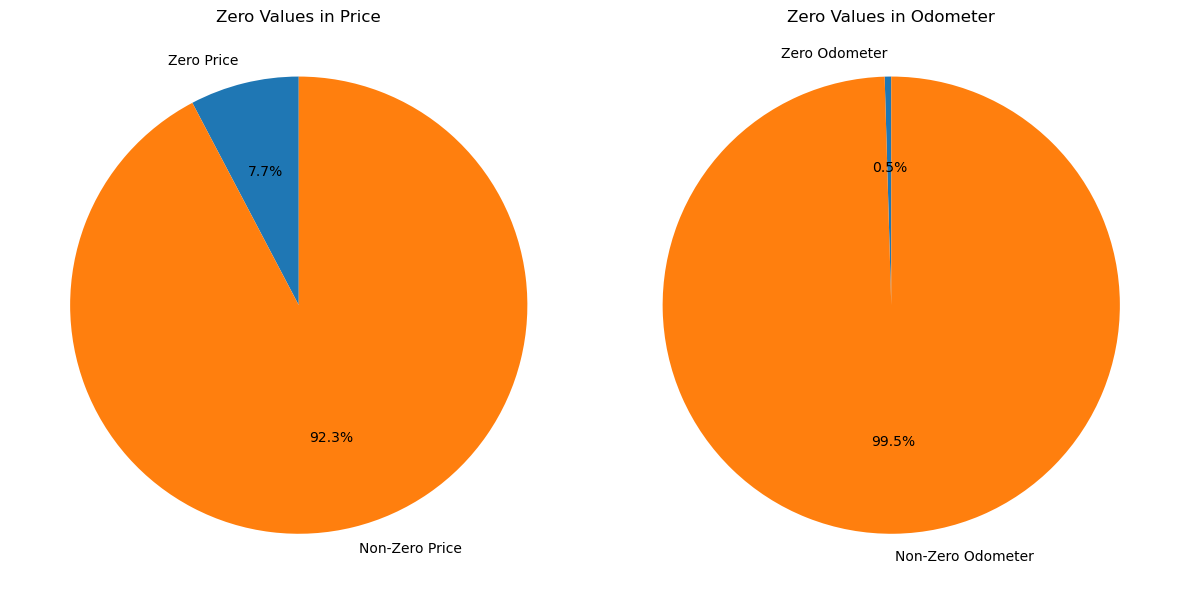

In [13]:
#to find the percentage of zero value of total record
price_zeros = rawData['price'].eq(0).sum()
odometer_zeros = rawData['odometer'].eq(0).sum()


# Total number of records
total_records = len(rawData)

# Calculate percentages
price_zero_percentage = (price_zeros / total_records) * 100
odometer_zero_percentage = (odometer_zeros / total_records) * 100

# Create the pie charts
labels_price = ['Zero Price', 'Non-Zero Price']
sizes_price = [price_zero_percentage, 100 - price_zero_percentage]

labels_odometer = ['Zero Odometer', 'Non-Zero Odometer']
sizes_odometer = [odometer_zero_percentage, 100-odometer_zero_percentage]


fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create a figure and two subplots

# Price Pie Chart
axes[0].pie(sizes_price, labels=labels_price, autopct='%1.1f%%', startangle=90)
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].set_title('Zero Values in Price')

# Odometer Pie Chart
axes[1].pie(sizes_odometer, labels=labels_odometer, autopct='%1.1f%%', startangle=90)
axes[1].axis('equal')
axes[1].set_title('Zero Values in Odometer')


plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig('./images/zero_values_pie_charts.png')
plt.show()



### **Data Observation1**: Price has got around 32895 zero values of 6.6% of total data, Possible that these records dummy/unused and not interested for dealership, will drop $0 price records.

### ****Data Observation2****:odometer has got around 1965 zero values of 0.5 % of total data 426879, though this smallest values of 0 will drop thise record.



### Check for Zero values in Categoraial features

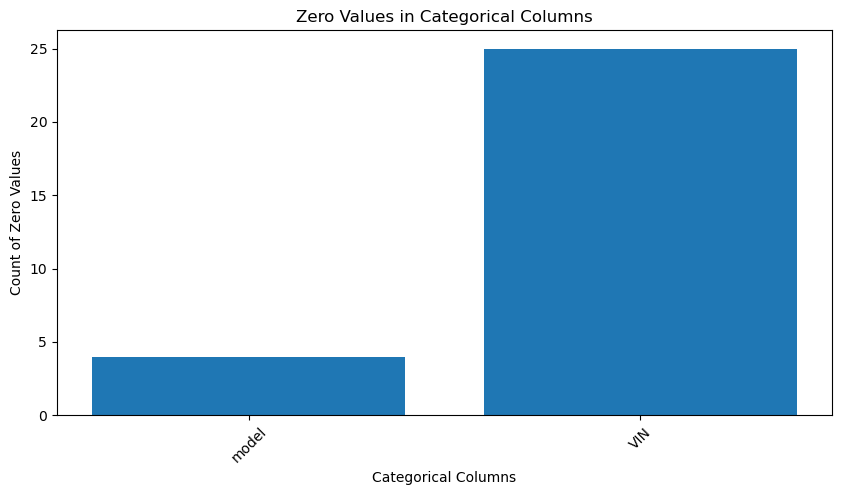

In [12]:
# Selecting categorical columns
categorical_columns = rawData.select_dtypes(include=['object']).columns

# Checking for zero counts in categorical columns
zero_counts = {col: (rawData[col] == '0').sum() for col in categorical_columns}

# Filtering out columns that have at least one zero entry
zero_counts = {col: count for col, count in zero_counts.items() if count > 0}

# Plotting the zero counts
if zero_counts:
    plt.figure(figsize=(10, 5))
    plt.bar(zero_counts.keys(), zero_counts.values())
    plt.xlabel('Categorical Columns')
    plt.ylabel('Count of Zero Values')
    plt.title('Zero Values in Categorical Columns')
    plt.xticks(rotation=45)
    plt.savefig('./images/zero_values_categorical.png')
    plt.show()
else:
    print("No zero values found in categorical columns.")

### ****Data Observation3****:looks there are few records in categorial field with VIN=0 and Model = 0 which records can be removed as with VIN and model number other data will be invalid also this percentage is less.

## Check for Duplicate records

In [17]:
duplicate_rows = rawData[rawData.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))
duplicate_rows


Number of duplicate rows: 0


Empty DataFrame
Columns: [id, region, price, year, manufacturer, model, condition, cylinders, fuel, odometer, title_status, transmission, VIN, drive, size, type, paint_color, state]
Index: []

In [18]:
# Identify VINs with inconsistencies in critical attributes
count = rawData['VIN'].value_counts()

duplicateRec = count[count > 1]

duplicate_vin_analysis = rawData[rawData['VIN'].isin(duplicateRec.index)].groupby('VIN')[
    ['year', 'odometer', 'title_status', 'transmission', 'drive', 'fuel', 'model']
].nunique()

duplicate_vin_analysis

year  odometer  title_status  transmission  drive  fuel  \
VIN                                                                          
0                     8         7             2             3      2     2   
0000000RN47028886     1         1             1             1      0     1   
0000000T05H107426     1         1             1             1      0     1   
0000000V264204442     1         1             1             1      1     1   
0000004Y83Z146570     1         1             1             1      0     1   
...                 ...       ...           ...           ...    ...   ...   
ZN661XUL7HX239289     1         1             0             1      1     1   
ZN661XUS7HX248033     1         1             1             1      0     1   
ZN661YUA4LX344692     1         1             1             1      0     1   
ZN661YUS0HX263351     1         1             1             1      1     1   
ZPBUA1ZL1KLA02237     1         1             1             1      1     1   

                   model  
VIN                       
0                      6  
0000000RN47028886      1  
0000000T05H107426      1  
0000000V264204442      1  
0000004Y83Z146570      1  
...                  ...  
ZN661XUL7HX239289      1  
ZN661XUS7HX248033      1  
ZN661YUA4LX344692      1  
ZN661YUS0HX263351      1  
ZPBUA1ZL1KLA02237      1  

[40280 rows x 7 columns]

In [19]:
rawData.query("VIN == '1FTER1EH1LLA36301'")
rawData.query("VIN == '1GCHTCE37G1186784'")

id                    region  price    year manufacturer  \
35      7316257769                    auburn  29990  2016.0    chevrolet   
251     7316160104                birmingham  29990  2016.0    chevrolet   
1855    7315245325                    dothan  29990  2016.0    chevrolet   
2166    7315385350  florence / muscle shoals  29990  2016.0    chevrolet   
2314    7316244323          gadsden-anniston  29990  2016.0    chevrolet   
...            ...                       ...    ...     ...          ...   
417059  7316774890                 green bay  29990  2016.0    chevrolet   
419188  7315296319                 la crosse  29990  2016.0    chevrolet   
419708  7316781953                   madison  29990  2016.0    chevrolet   
422238  7316655042                 milwaukee  29990  2016.0    chevrolet   
425661  7315280738                    wausau  29990  2016.0    chevrolet   

                        model condition    cylinders fuel  odometer  \
35      colorado extended cab      good  6 cylinders  gas   17302.0   
251     colorado extended cab      good  6 cylinders  gas   17302.0   
1855    colorado extended cab      good  6 cylinders  gas   17302.0   
2166    colorado extended cab      good  6 cylinders  gas   17302.0   
2314    colorado extended cab      good  6 cylinders  gas   17302.0   
...                       ...       ...          ...  ...       ...   
417059  colorado extended cab      good  6 cylinders  gas   17302.0   
419188  colorado extended cab      good  6 cylinders  gas   17302.0   
419708  colorado extended cab      good  6 cylinders  gas   17302.0   
422238  colorado extended cab      good  6 cylinders  gas   17302.0   
425661  colorado extended cab      good  6 cylinders  gas   17302.0   

       title_status transmission                VIN drive size    type  \
35            clean        other  1GCHTCE37G1186784   4wd  NaN  pickup   
251           clean        other  1GCHTCE37G1186784   4wd  NaN  pickup   
1855          clean        other  1GCHTCE37G1186784   4wd  NaN  pickup   
2166          clean        other  1GCHTCE37G1186784   4wd  NaN  pickup   
2314          clean        other  1GCHTCE37G1186784   4wd  NaN  pickup   
...             ...          ...                ...   ...  ...     ...   
417059        clean        other  1GCHTCE37G1186784   4wd  NaN  pickup   
419188        clean        other  1GCHTCE37G1186784   4wd  NaN  pickup   
419708        clean        other  1GCHTCE37G1186784   4wd  NaN  pickup   
422238        clean        other  1GCHTCE37G1186784   4wd  NaN  pickup   
425661        clean        other  1GCHTCE37G1186784   4wd  NaN  pickup   

       paint_color state  
35             red    al  
251            red    al  
1855           red    al  
2166           red    al  
2314           red    al  
...            ...   ...  
417059         red    wi  
419188         red    wi  
419708         red    wi  
422238         red    wi  
425661         red    wi  

[214 rows x 18 columns]

In [20]:
# Find VINs with variations in any critical attribute
vins_with_issues = duplicate_vin_analysis[
    (duplicate_vin_analysis['year'] > 1) |
    (duplicate_vin_analysis['transmission'] > 1) |
    (duplicate_vin_analysis['drive'] > 1) |
    (duplicate_vin_analysis['fuel'] > 1) |
    (duplicate_vin_analysis['model'] > 1)
].index


# Step 5: Count the total number of records with VIN inconsistencies
total_vin_with_issues = rawData[rawData['VIN'].isin(vins_with_issues)].shape[0]
total_vin_with_issues


13062

In [21]:
df_duplicateVIN = rawData[rawData['VIN'].isin(vins_with_issues)].copy()
df_duplicateVIN.shape

(13062, 18)

C:\Users\isaac\AppData\Local\Temp\ipykernel_15272\3899252055.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vins.index, y=top_vins.values, palette="coolwarm")


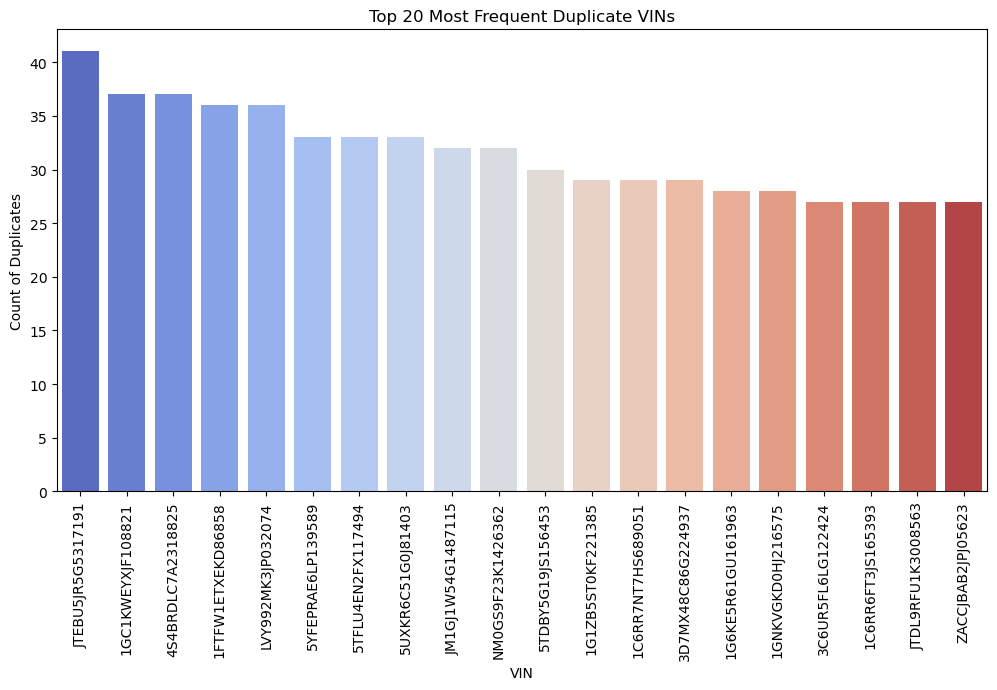

In [22]:
# Count duplicate VIN occurrences
vin_counts = df_duplicateVIN['VIN'].value_counts()

# Get the top 20 duplicated VINs
top_vins = vin_counts[:20]

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=top_vins.index, y=top_vins.values, palette="coolwarm")

# Formatting
plt.xticks(rotation=90)
plt.xlabel("VIN")
plt.ylabel("Count of Duplicates")
plt.title("Top 20 Most Frequent Duplicate VINs")
plt.savefig('./images/duplicate_vins.png')
plt.show()

### ****Data Observation3**:

- Noticed that same VIN number is listed multiple times the regions are different few vin as got same odometer value, year.
- The dataset contains 40,280 unique VINs that have duplicate entries. This means that these 40,280 vehicles have been listed multiple times, contributing to the 348,914 duplicate rows identified earlier
- this depends on various other features like year, odometer, title_status, transmission, drive, fuel and model
- so,
-- Data entry errors
-- Multiple listings of the same vehicle with updated details
-- Incorrect merging of datasets
so around 15297 duplicate records exists multiple times.

## Check for Unique Records

In [23]:
rawData.nunique()

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

### **Data Observation4**: id value matches the total count of records, how ever the **VIN value contains duplicates**  as seen above.


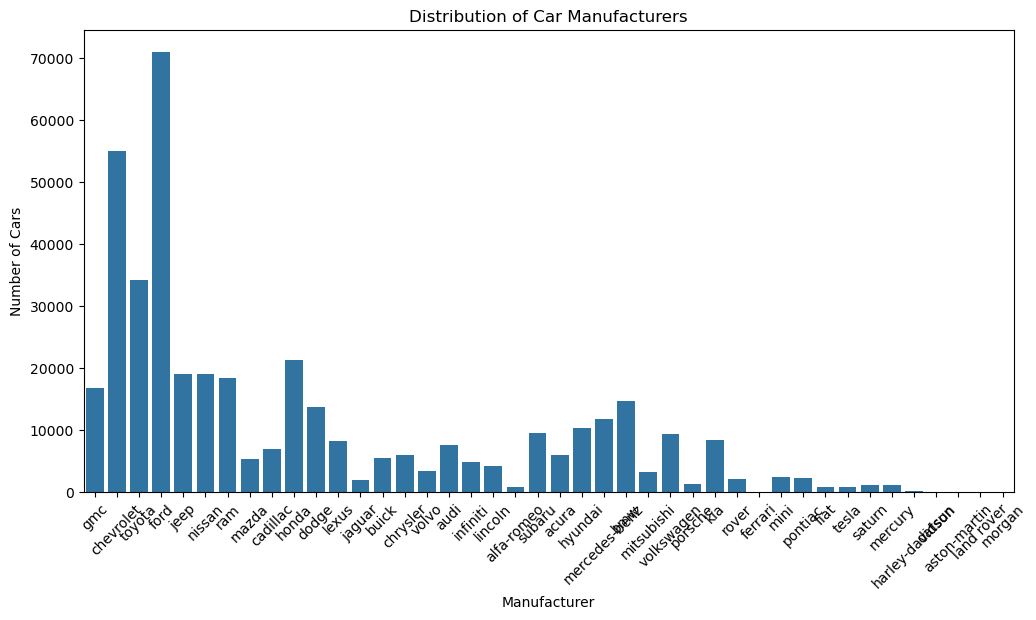

In [25]:
# prompt: plot graph for manufacturer


# Assuming 'manufacturer' is a column in your rawData DataFrame
plt.figure(figsize=(12, 6))
sns.countplot(x='manufacturer', data=rawData)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Distribution of Car Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Cars')
plt.savefig('./images/manufacturer_distribution.png')
plt.show()



**Data Observation5**

**Top Manufacturers Dominate Listings**

- Certain manufacturers such as Ford, Chevrolet, Toyota, Honda, and Nissan have significantly higher listings, indicating their widespread presence and popularity in the used car market.
- This aligns with real-world trends where these brands are among the highest-selling automotive manufacturers.

**American Brands Lead the Market**

- Ford and Chevrolet have the highest number of listings, showing strong demand for American-made vehicles.
- Brands like Dodge, GMC, and Jeep also have substantial representation, reflecting the popularity of trucks and SUVs.

**Japanese Brands are Strong Contenders**

- Toyota and Honda are among the most listed brands, reflecting their reputation for reliability, fuel efficiency, and resale value.
- Nissan, Subaru, and Mazda also have notable listings, reinforcing the popularity of Japanese cars in the used market.

**European Manufacturers Have Lower Representation**

- Brands like BMW, Mercedes-Benz, and Volkswagen have fewer listings compared to American and Japanese brands.
- This may be due to higher maintenance costs, lower resale demand, or fewer units in circulation.

**Luxury and Specialty Brands Have Minimal Listings**

- High-end manufacturers such as Tesla, Porsche, and Land Rover have relatively fewer listings.
- These brands cater to niche markets, and their high prices might limit their availability in the used car market.

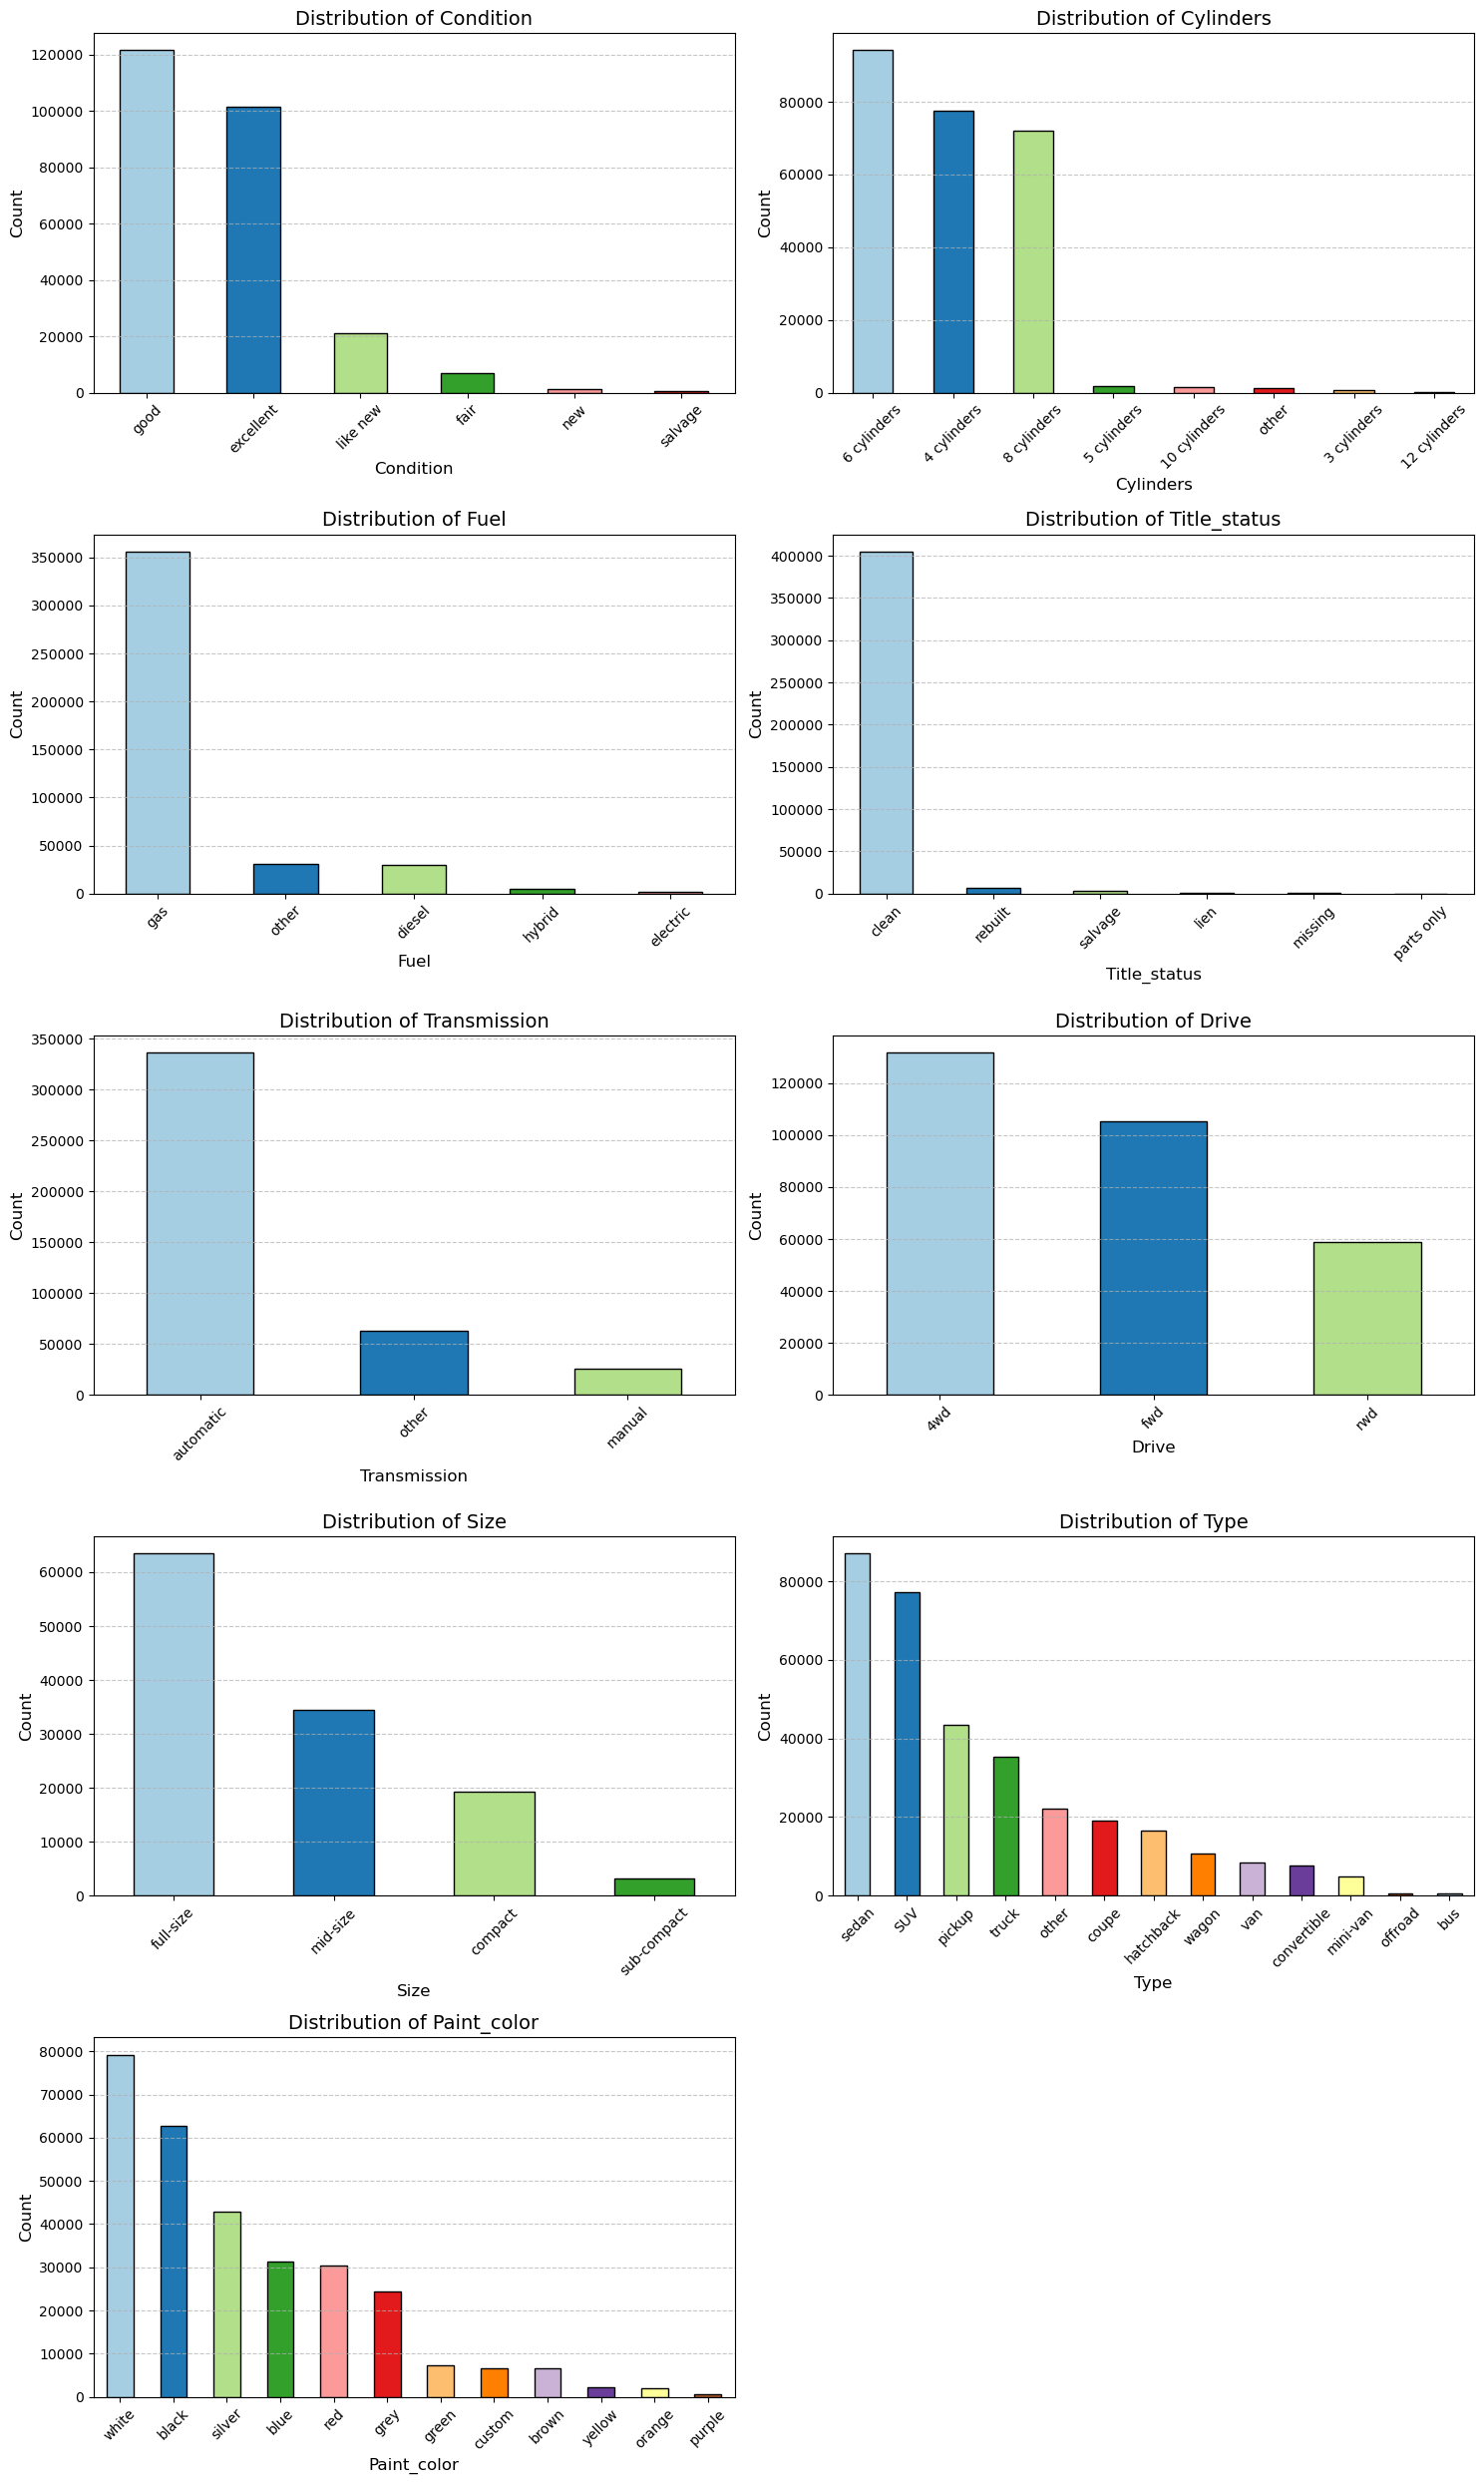

In [27]:
columns_to_plot = ["condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color"]

# Set figure size and layout with 2 graphs per row
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))
axes = axes.flatten()

# Create a bar chart for each column
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    rawData[column].value_counts().plot(kind="bar", color=plt.cm.Paired.colors, edgecolor="black", ax=ax)
    ax.set_title(f"Distribution of {column.capitalize()}", fontsize=14)
    ax.set_xlabel(column.capitalize(), fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis="y", linestyle="--", alpha=0.7)

# Hide any empty subplots if needed
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('./images/column_distribution.png')
plt.show()


### **Data Observation6**

**Condition Distribution**

- The majority of the vehicles in the dataset are categorized under a few specific conditions, with many missing or unknown values.
- "Like new" and "Excellent" conditions appear to be more frequent, while "Salvage" and "Fair" conditions are less common.

**Cylinders Distribution**

- 4-cylinder and 6-cylinder vehicles dominate the dataset, indicating a preference for fuel-efficient and mid-range performance vehicles.
- 8-cylinder engines, often found in trucks and sports cars, are also present but in smaller numbers.

**Fuel Type Distribution**

- Gasoline is the most common fuel type, suggesting that traditional fuel-powered vehicles still dominate the market.
- Diesel and hybrid vehicles have relatively lower counts, while electric vehicles make up a small fraction of the dataset.

**Title Status**

- The majority of the vehicles have a "Clean" title, meaning they have not been significantly damaged.
- "Salvage" and "Rebuilt" titles are less frequent, indicating that heavily damaged or repaired vehicles are not as common in listings.

**Transmission Type**

- Automatic transmission is the most prevalent, showing a strong consumer preference for convenience over manual shifting.
- Manual transmission vehicles are significantly less common, often associated with sports cars or older models.

**Drive Type**

- Front-wheel drive (FWD) and four-wheel drive (4WD/AWD) vehicles appear to be the most common.
- Rear-wheel drive (RWD) vehicles are less frequent, likely due to their association with sports cars and specific performance vehicles.

**Size Distribution**

- The dataset has a significant number of "Full-size" and "Mid-size" vehicles.
- Compact cars and subcompacts have a lower frequency, possibly due to demand differences in different regions.

**Vehicle Type**

- Trucks, SUVs, and sedans dominate the listings, which aligns with market trends favoring utility and comfort.
- Other types like convertibles and coupes have lower counts, likely reflecting niche market demand.

**Paint Color Distribution**

- The most common colors include black, white, silver, and gray, which are often considered standard and preferred for resale value.
- Uncommon colors like yellow, orange, and purple appear much less frequently, indicating a smaller market for such vehicles.

**Note**
The dataset reveals strong consumer preferences for gasoline-powered, automatic transmission vehicles with clean titles.
The most frequent vehicle categories are trucks, SUVs, and sedans, aligning with real-world sales trends.
Fuel efficiency (4-cylinder engines), neutral paint colors, and mid-size to full-size cars dominate the listings, indicating market demand for practicality and affordability.
There is a relatively low presence of electric, hybrid, and alternative-fuel vehicles, which might indicate slower adoption rates compared to gasoline-powered cars.

In [29]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

## Check for Outliers

In [31]:
rawData.describe()


id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07

**Findings 5**: From describe which fetchs only int & float numerical statstics , ID columns might be not intereseted or relevant to car dealership client, which can be drop off


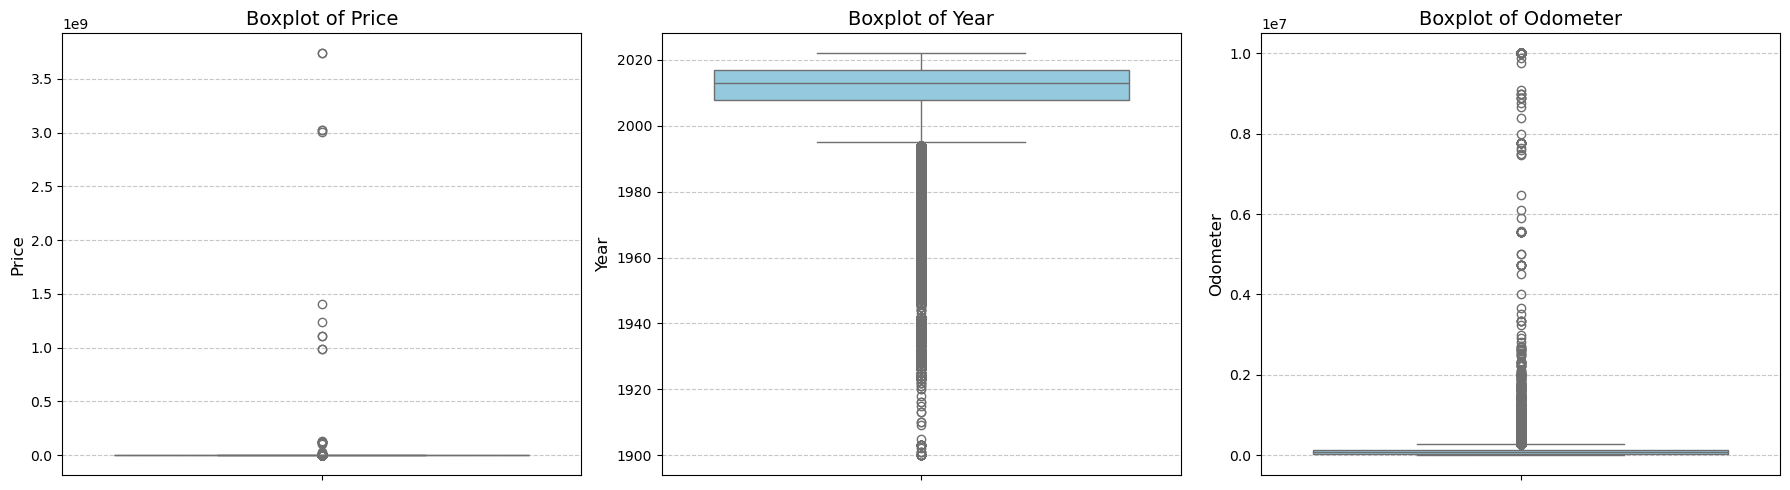

In [33]:
# Select numerical columns for outlier detection
numerical_columns = ["price", "year", "odometer"]

# Set figure size for side-by-side comparison
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Create boxplots for detecting outliers side by side
for i, column in enumerate(numerical_columns):
    sns.boxplot(y=rawData[column], color="skyblue", ax=axes[i])
    axes[i].set_title(f"Boxplot of {column.capitalize()}", fontsize=14)
    axes[i].set_ylabel(column.capitalize(), fontsize=12)
    axes[i].grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('./images/boxplot_outliers.png')
plt.show()


In [34]:
#Remove outliers for better visualization
cars_no_outliers = rawData[rawData['price'] < rawData['price'].quantile(0.99)]  #inspecting 99% of the 'price' data
cars_no_outliers = cars_no_outliers[cars_no_outliers['year'] < cars_no_outliers['price'].quantile(0.99)]  #inspecting 99% of the 'year' data
cars_no_outliers = cars_no_outliers[cars_no_outliers['odometer'] < cars_no_outliers['odometer'].quantile(0.99)]  #inspecting 99% of the 'odometer' data

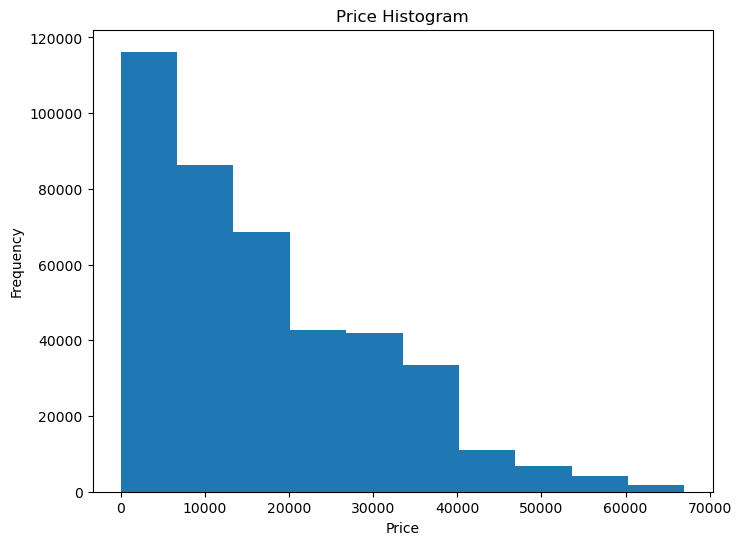

<Figure size 640x480 with 0 Axes>

In [35]:
#Histogram of Price
plt.figure(figsize=(8, 6))
plt.hist(cars_no_outliers['price'])
plt.title('Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
plt.savefig('./images/distribution_price.png')

**Data Observation7**

**Price Outliers**

- The price distribution shows a significant number of extreme outliers.
- There are vehicles listed at extremely low prices (potentially unrealistic or promotional listings) and very high prices, possibly luxury or rare models.
- A reasonable price range should be determined to filter out erroneous data points.
- There are some listings where the price is recorded as zero.
- This could indicate:
-- Missing data where sellers did not input the price.
--  Incorrect or erroneous entries, which may need data cleaning

**Year Outliers**

- The year of manufacture appears to have some older vehicles that could be classified as vintage/classic cars.
- There may also be some outliers for future years, which could be incorrect or pre-orders rather than used listings.
- The bulk of the data is likely centered around more recent model years.

**Odometer Outliers**

- The odometer readings display a wide range, with some vehicles having extremely high mileage.
- Some extremely low-mileage cars could be newly listed or incorrect entries.
- High mileage vehicles may indicate well-used or older vehicles, whereas exceptionally low mileage could indicate showroom models or incorrect entries.

##Check for Missing Values (NaN)

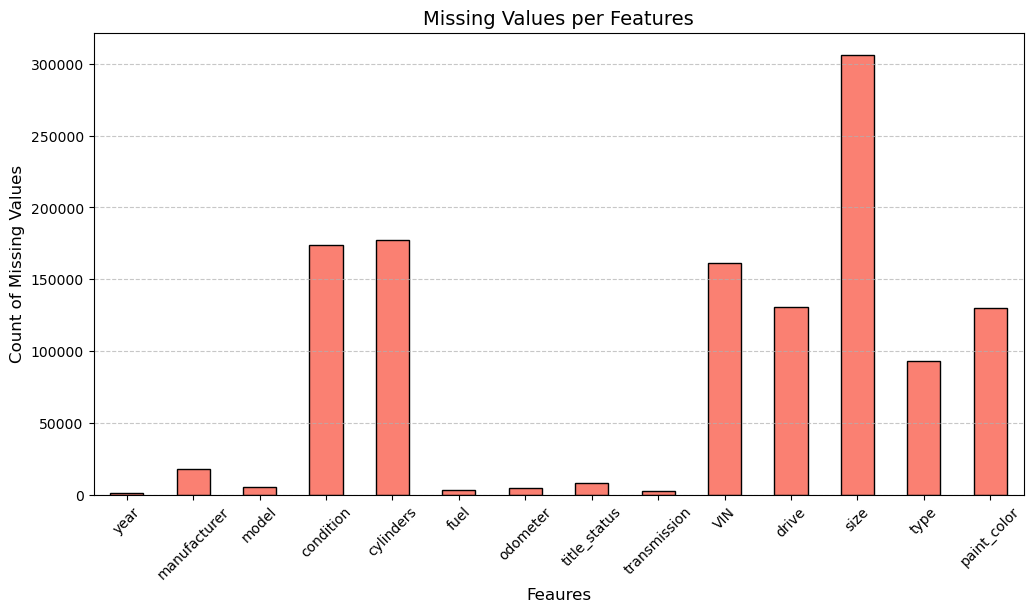

In [36]:
# Filter columns with missing values
missing_values = rawData.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Convert to DataFrame for visualization
missing_values_df = pd.DataFrame(missing_values, columns=["Missing Values"])
missing_values_df["Percentage"] = (missing_values_df["Missing Values"] / len(rawData)) * 100

# Plot missing values as a bar chart
plt.figure(figsize=(12, 6))
missing_values_df["Missing Values"].plot(kind="bar", color="salmon", edgecolor="black")
plt.title("Missing Values per Features", fontsize=14)
plt.xlabel("Feaures", fontsize=12)
plt.ylabel("Count of Missing Values", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig('./images/missing_values.png')
plt.show()


In [37]:
# Check missing values in the 'size' column
missing_size_count = rawData['VIN'].isnull().sum()
total_entries = len(rawData)
missing_percentage = (missing_size_count / total_entries) * 100

# Print the results
print(f"Total Entries: {total_entries}")
print(f"Missing Values in 'VIN' feature: {missing_size_count}")
print(f"Percentage of Missing Values: {missing_percentage:.2f}%")

Total Entries: 426880
Missing Values in 'VIN' feature: 161042
Percentage of Missing Values: 37.73%


In [38]:
# Check missing values in the 'size' column
missing_size_count = rawData['size'].isnull().sum()
total_entries = len(rawData)
missing_percentage = (missing_size_count / total_entries) * 100

# Print the results
print(f"Total Entries: {total_entries}")
print(f"Missing Values in 'size' column: {missing_size_count}")
print(f"Percentage of Missing Values: {missing_percentage:.2f}%")

Total Entries: 426880
Missing Values in 'size' column: 306361
Percentage of Missing Values: 71.77%


###Data Observation 10
- size feature as got around 71% of data missing, may this feature can be dropped.
- VIN feautre got 37% missing may be it is valid to remove the complete row as without VIN details entered would be inaccurate
- Year missing data as low percentage from above graph can be removed for the same

**Data Observation8**

**Recomendation**
- Drop rows if missing values are low (e.g., missing year).
- Fill categorical values with mode (manufacturer, fuel, transmission).
- Fill missing numerical values with median (price, odometer).
- Drop columns with excessive missing data if they are not critical (size)

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

## Drop row for duplicate VIN number based on price and odometer

In [39]:
rawData.shape

(426880, 18)

In [41]:
df_usedCar = pd.DataFrame.copy(rawData)
df_usedCar.shape

(426880, 18)

In [42]:
df_usedCar.drop_duplicates(subset=['VIN','price', 'odometer'], inplace=True)
df_usedCar.shape

(211771, 18)

## Drop rows for VIN column = '0'

In [43]:
df_usedCar.VIN.eq('0').sum()

8

In [44]:
df_usedCar.drop(df_usedCar[df_usedCar['VIN'] == '0'].index, inplace=True)
df_usedCar.shape

(211763, 18)

## Drop Columns that are not required (id, VIN & region)

In [45]:
df_usedCar.drop(columns=['id', 'VIN','region'], inplace=True)
df_usedCar.shape

(211763, 15)

## Drop Columns for size contains 71% of missing value

In [46]:
df_usedCar.drop(columns=['size'], inplace=True)
df_usedCar.shape

(211763, 14)

## Drop zero values for Price & Odometer

In [47]:
df_usedCar.price.eq(0).sum()

15504

In [48]:
df_usedCar.odometer.eq(0).sum()

723

In [50]:
df_usedCar.drop(df_usedCar[df_usedCar['price'] == 0].index, inplace=True)
df_usedCar.shape

(195671, 14)

In [51]:
df_usedCar.drop(df_usedCar[df_usedCar['odometer'] == 0].index, inplace=True)
df_usedCar.shape

(195671, 14)

### Fill categorial Null values (NaN) to Not specified

In [52]:
fill_columns = ['condition','cylinders','drive','paint_color','type','title_status','transmission','manufacturer','model','fuel']
for col in fill_columns:
    df_usedCar[col] = df_usedCar[col].fillna('Notspecified')

In [53]:
df_usedCar.isnull().sum()

price              0
year             659
manufacturer       0
model              0
condition          0
cylinders          0
fuel               0
odometer        1127
title_status       0
transmission       0
drive              0
type               0
paint_color        0
state              0
dtype: int64

### Drop null values for numerical field

In [54]:
df_usedCar.dropna(inplace=True)
df_usedCar.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

In [55]:
df_usedCar.shape

(193933, 14)

## Convert DataTypes Object to String

In [59]:
df_usedCar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193933 entries, 27 to 426838
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         193933 non-null  int64 
 1   year          193933 non-null  int32 
 2   manufacturer  193933 non-null  object
 3   model         193933 non-null  object
 4   condition     193933 non-null  object
 5   cylinders     193933 non-null  object
 6   fuel          193933 non-null  object
 7   odometer      193933 non-null  int32 
 8   title_status  193933 non-null  object
 9   transmission  193933 non-null  object
 10  drive         193933 non-null  object
 11  type          193933 non-null  object
 12  paint_color   193933 non-null  object
 13  state         193933 non-null  object
dtypes: int32(2), int64(1), object(11)
memory usage: 20.7+ MB


In [60]:
df_usedCar['year'] = df_usedCar['year'].astype(int)
df_usedCar['odometer'] = df_usedCar['odometer'].astype(int)

In [61]:
df_usedCar = df_usedCar.convert_dtypes()

In [62]:
df_usedCar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193933 entries, 27 to 426838
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         193933 non-null  Int64 
 1   year          193933 non-null  Int32 
 2   manufacturer  193933 non-null  string
 3   model         193933 non-null  string
 4   condition     193933 non-null  string
 5   cylinders     193933 non-null  string
 6   fuel          193933 non-null  string
 7   odometer      193933 non-null  Int32 
 8   title_status  193933 non-null  string
 9   transmission  193933 non-null  string
 10  drive         193933 non-null  string
 11  type          193933 non-null  string
 12  paint_color   193933 non-null  string
 13  state         193933 non-null  string
dtypes: Int32(2), Int64(1), string(11)
memory usage: 21.3 MB


## Log Transformation for outliers

In [71]:
#Remove outliers for better visualization
car_no_outliers = df_usedCar[df_usedCar['price'] < df_usedCar['price'].quantile(0.99)]  #inspecting 99% of the 'price' data
cars_no_outliers = cars_no_outliers[cars_no_outliers['year'] < cars_no_outliers['price'].quantile(0.99)]  #inspecting 99% of the 'year' data
cars_no_outliers = cars_no_outliers[cars_no_outliers['odometer'] < cars_no_outliers['odometer'].quantile(0.99)]  #inspecting 99% of the 'odometer' data

In [72]:
car_no_outliers.shape

(191993, 14)

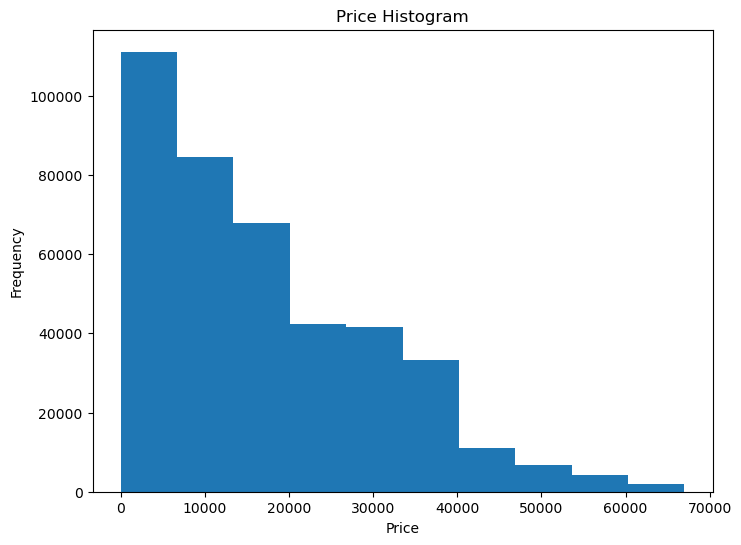

In [73]:
plt.figure(figsize=(8, 6))
plt.hist(cars_no_outliers['price'])
plt.title('Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.savefig('./images/distribution_price.png')
plt.show()

In [74]:
# Select numerical columns for log transformation
numerical_columns = ['price', 'odometer','year']

# Apply log transformation to reduce the effect of outliers
df_usedCar_log = df_usedCar.copy()
#df_usedCar_log = cars_no_outliers.copy()
for col in numerical_columns:
    df_usedCar_log[col] = np.log1p(df_usedCar[col])  # log1p avoids log(0) issues

In [75]:
df_usedCar_log.shape

(193933, 14)

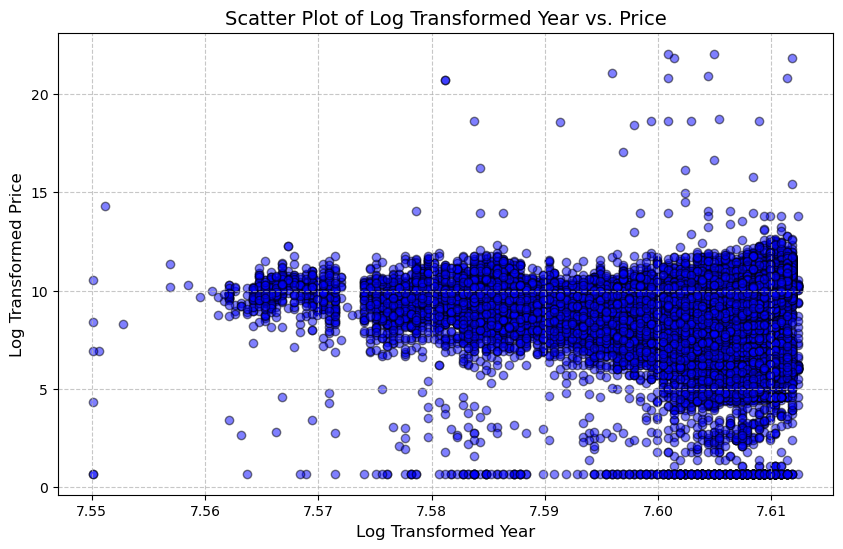

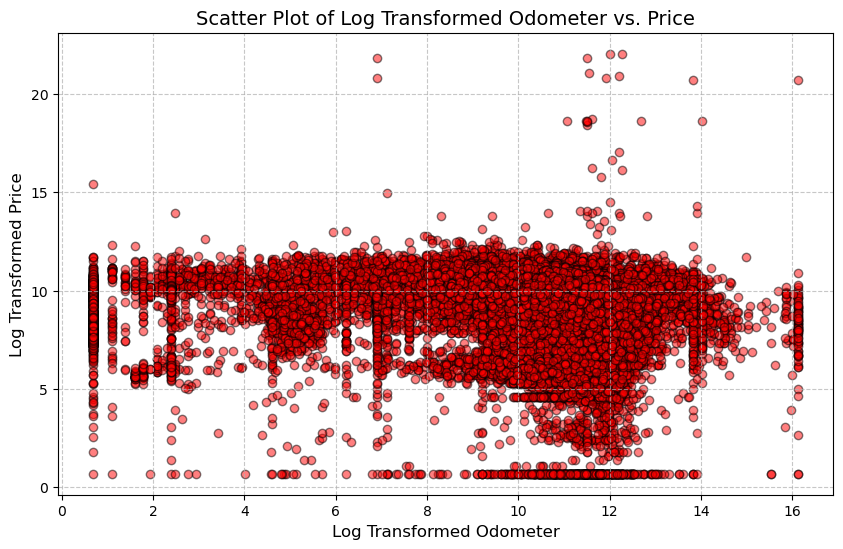

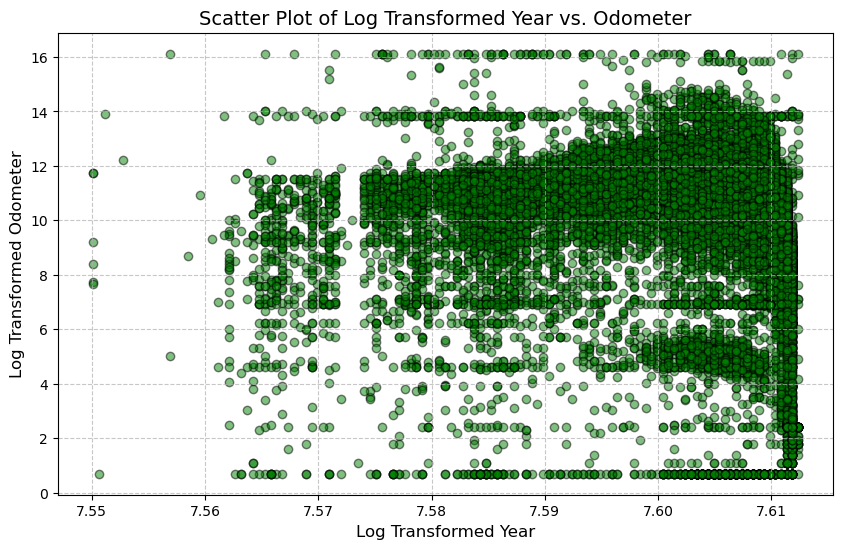

In [76]:
# Scatter plot for log-transformed year vs. log-transformed price
plt.figure(figsize=(10, 6))
plt.scatter(df_usedCar_log['year'], df_usedCar_log['price'], alpha=0.5, color='blue', edgecolors='black')

# Labels and title
plt.xlabel("Log Transformed Year", fontsize=12)
plt.ylabel("Log Transformed Price", fontsize=12)
plt.title("Scatter Plot of Log Transformed Year vs. Price", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.savefig('./images/scatter_plot year vs price.png')
plt.show()

# Scatter plot for log-transformed odometer vs. log-transformed price
plt.figure(figsize=(10, 6))
plt.scatter(df_usedCar_log['odometer'], df_usedCar_log['price'], alpha=0.5, color='red', edgecolors='black')

# Labels and title
plt.xlabel("Log Transformed Odometer", fontsize=12)
plt.ylabel("Log Transformed Price", fontsize=12)
plt.title("Scatter Plot of Log Transformed Odometer vs. Price", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.savefig('./images/scatter_plot odometer vs price.png')
plt.show()

# Scatter plot for log-transformed year  vs. log-transformed odometer
plt.figure(figsize=(10, 6))
plt.scatter(df_usedCar_log['year'], df_usedCar_log['odometer'], alpha=0.5, color='green', edgecolors='black')

# Labels and title
plt.xlabel("Log Transformed Year", fontsize=12)
plt.ylabel("Log Transformed Odometer", fontsize=12)
plt.title("Scatter Plot of Log Transformed Year vs. Odometer", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.savefig('./images/scatter_plot year vs odometer.png')
plt.show()

## Observation
**Year vs. Price**

- Older vehicles (lower years) generally have lower prices.
- Newer vehicles tend to have higher prices.
- Some outliers exist where older cars have high prices (potentially classic or luxury cars).

**Odometer vs. Price**

- Vehicles with higher odometer readings generally have lower prices.
- Some vehicles deviate from this trend, which could indicate luxury vehicles or misreported data.

## Applying PCA for removing outliers

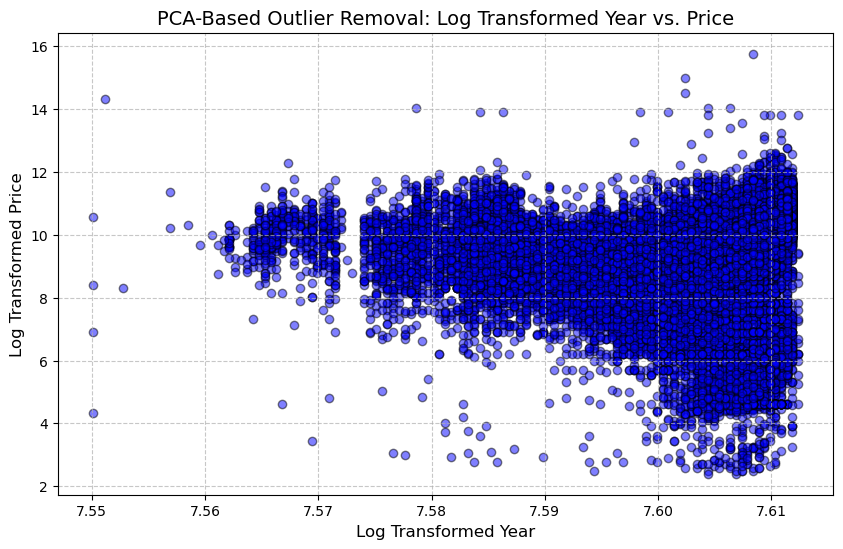

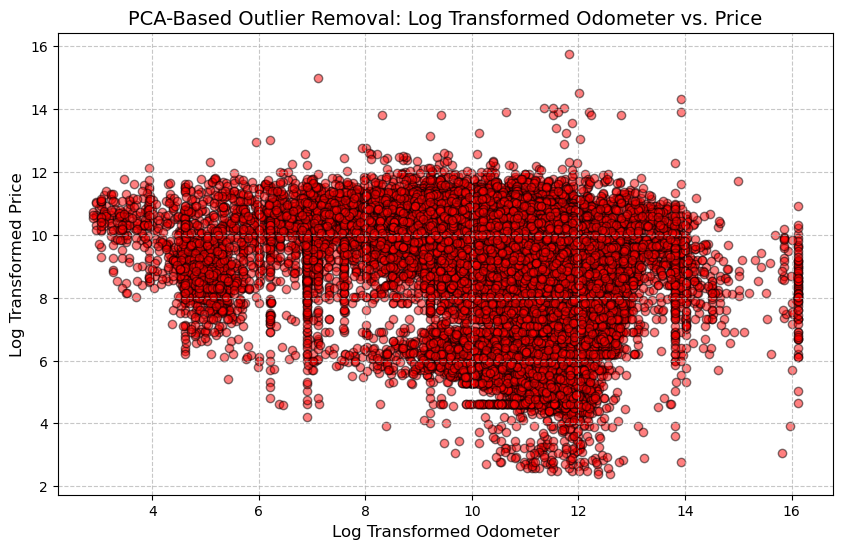

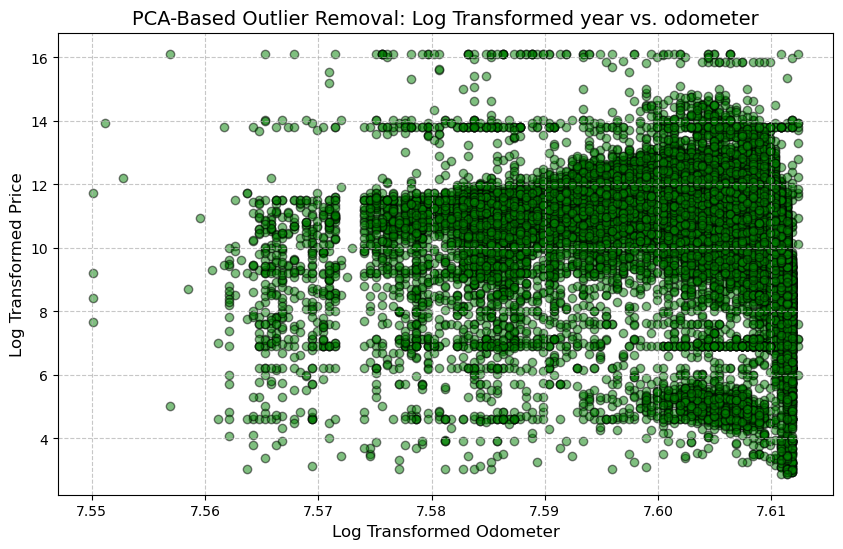

In [79]:
from sklearn.decomposition import PCA
from scipy.spatial.distance import mahalanobis
import scipy.stats as stats

# Apply PCA (keep top 2 components)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_usedCar_log[['price', 'odometer', 'year']])

# Compute Mahalanobis distance for each point
mean = np.mean(pca_features, axis=0)
cov_matrix = np.cov(pca_features.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)

df_usedCar_log['Mahalanobis_Distance'] = [mahalanobis(x, mean, inv_cov_matrix) for x in pca_features]

# Define threshold for outliers (e.g., 95th percentile)
threshold = stats.chi2.ppf(0.95, df=2)  # 95% confidence interval
df_no_outliers_pca = df_usedCar_log[df_usedCar_log['Mahalanobis_Distance'] < threshold]

# Scatter plot after PCA outlier removal
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers_pca['year'], df_no_outliers_pca['price'], alpha=0.5, color='blue', edgecolors='black')
plt.xlabel("Log Transformed Year", fontsize=12)
plt.ylabel("Log Transformed Price", fontsize=12)
plt.title("PCA-Based Outlier Removal: Log Transformed Year vs. Price", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('./images/scatter_plot_pca year vs price.png')
plt.show()

# Scatter plot after PCA outlier removal
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers_pca['odometer'], df_no_outliers_pca['price'], alpha=0.5, color='red', edgecolors='black')
plt.xlabel("Log Transformed Odometer", fontsize=12)
plt.ylabel("Log Transformed Price", fontsize=12)
plt.title("PCA-Based Outlier Removal: Log Transformed Odometer vs. Price", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('./images/scatter_plot_pca odometer vs price.png')
plt.show()

# Scatter plot after PCA outlier removal
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers_pca['year'], df_no_outliers_pca['odometer'], alpha=0.5, color='green', edgecolors='black')
plt.xlabel("Log Transformed Odometer", fontsize=12)
plt.ylabel("Log Transformed Price", fontsize=12)
plt.title("PCA-Based Outlier Removal: Log Transformed year vs. odometer", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('./images/scatter_plot_pca year vs odometer.png')
plt.show()



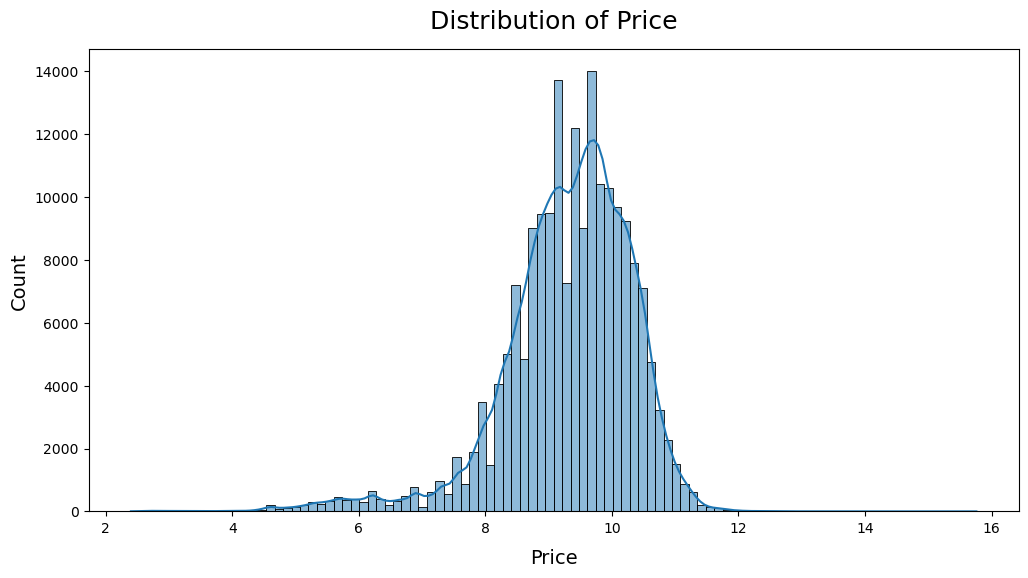

<Figure size 640x480 with 0 Axes>

In [80]:
plt.figure(figsize=(12,6))
sns.histplot(x='price', data=df_no_outliers_pca, kde=True, bins=100)
plt.title('Distribution of Price', fontsize=18, pad=15)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Price', fontsize=14, labelpad=10)
plt.show()
plt.savefig('./images/distribution_price.png')

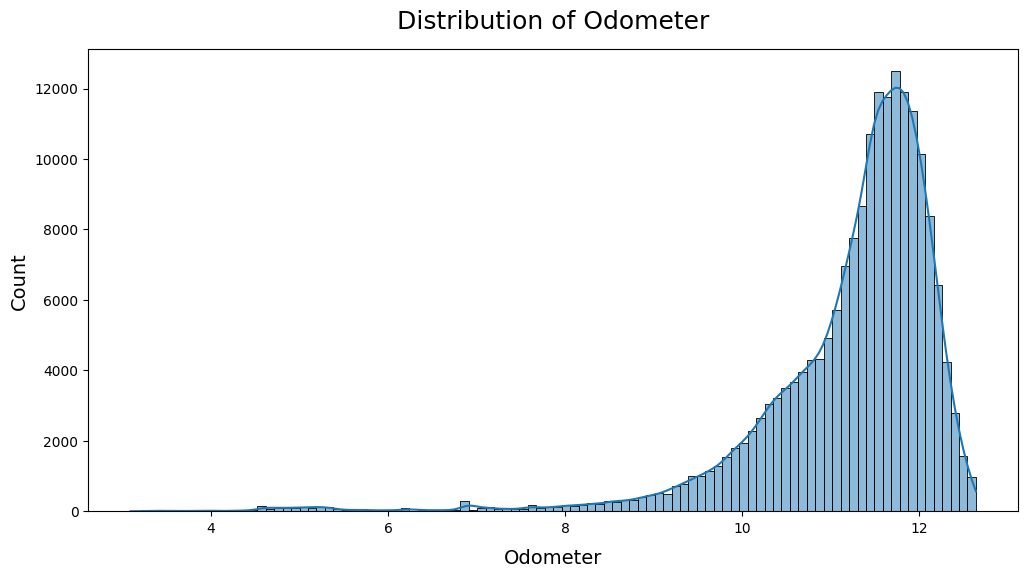

<Figure size 640x480 with 0 Axes>

In [265]:
plt.figure(figsize=(12,6))
sns.histplot(x='odometer', kde=True, bins=100, data=df_no_outliers_pca)
plt.title('Distribution of Odometer', fontsize=18, pad=15)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Odometer', fontsize=14, labelpad=10)
plt.show()
plt.savefig('./images/distribution_odometer.png')

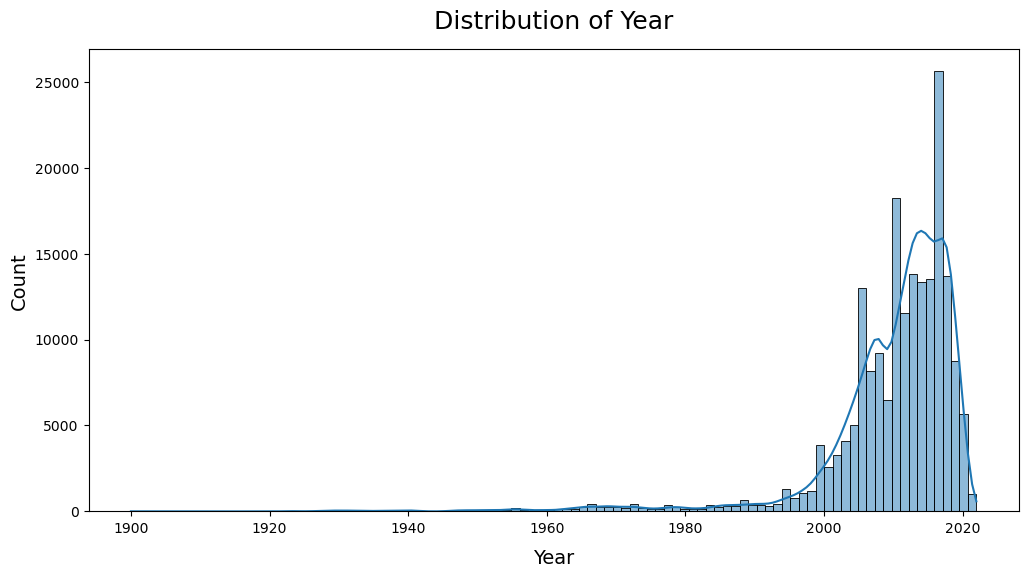

<Figure size 640x480 with 0 Axes>

In [81]:
plt.figure(figsize=(12,6))
sns.histplot(x='year', kde=True, bins=100, data=df_usedCar)
plt.title('Distribution of Year', fontsize=18, pad=15)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Year', fontsize=14, labelpad=10)
plt.show()
plt.savefig('./images/distribution_year.png')

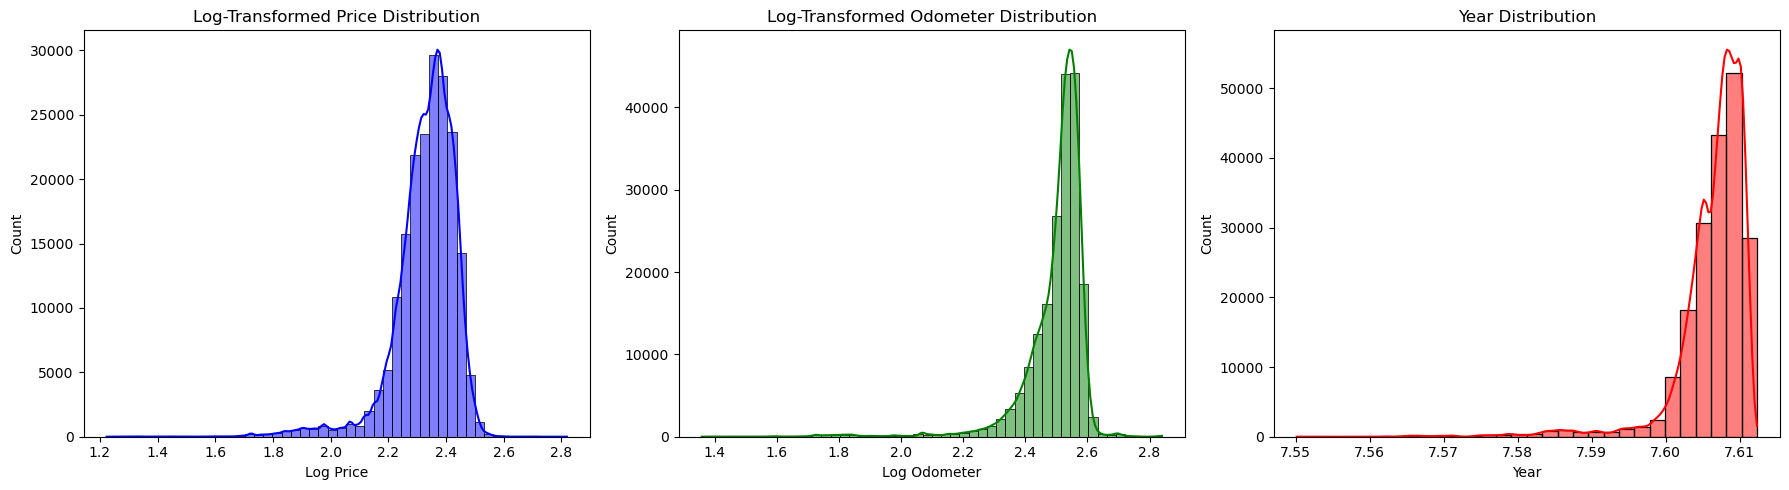

In [83]:
# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Log transformation to improve scale visibility
df_no_outliers_pca.loc[:, 'log_price'] = np.log1p(df_no_outliers_pca['price'])
df_no_outliers_pca.loc[:,'log_odometer'] = np.log1p(df_no_outliers_pca['odometer'])

# Plot Price Distribution (Log Scale)
sns.histplot(df_no_outliers_pca['log_price'], kde=True, ax=axes[0], color='blue', bins=50)
axes[0].set_title('Log-Transformed Price Distribution')
axes[0].set_xlabel('Log Price')

# Plot Odometer Distribution (Log Scale)
sns.histplot(df_no_outliers_pca['log_odometer'], kde=True, ax=axes[1], color='green', bins=50)
axes[1].set_title('Log-Transformed Odometer Distribution')
axes[1].set_xlabel('Log Odometer')

# Plot Year Distribution (Raw Scale)
sns.histplot(df_no_outliers_pca['year'], kde=True, ax=axes[2], color='red', bins=30)
axes[2].set_title('Year Distribution')
axes[2].set_xlabel('Year')

# Formatting
plt.tight_layout()
plt.savefig('./images/pca_distribution.png')
plt.show()


In [267]:
df_no_outliers_pca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188010 entries, 27 to 426838
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 188010 non-null  Float64
 1   year                  188010 non-null  Float64
 2   manufacturer          188010 non-null  string 
 3   model                 188010 non-null  string 
 4   condition             188010 non-null  string 
 5   cylinders             188010 non-null  string 
 6   fuel                  188010 non-null  string 
 7   odometer              188010 non-null  Float64
 8   title_status          188010 non-null  string 
 9   transmission          188010 non-null  string 
 10  drive                 188010 non-null  string 
 11  type                  188010 non-null  string 
 12  paint_color           188010 non-null  string 
 13  state                 188010 non-null  string 
 14  Mahalanobis_Distance  188010 non-null  float64
dtypes: F

In [97]:
df_no_outliers_pca_copy = pd.DataFrame.copy(df_no_outliers_pca)
df_no_outliers_pca_copy['price'] = df_no_outliers_pca_copy['price'].astype(int)
df_no_outliers_pca_copy['odometer'] = df_no_outliers_pca_copy['odometer'].astype(int)
df_no_outliers_pca_copy['year'] = df_no_outliers_pca_copy['year'].astype(int)

In [98]:
df_no_outliers_pca_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191837 entries, 27 to 426838
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 191837 non-null  int32  
 1   year                  191837 non-null  int32  
 2   manufacturer          191837 non-null  string 
 3   model                 191837 non-null  string 
 4   condition             191837 non-null  string 
 5   cylinders             191837 non-null  string 
 6   fuel                  191837 non-null  string 
 7   odometer              191837 non-null  int32  
 8   title_status          191837 non-null  string 
 9   transmission          191837 non-null  string 
 10  drive                 191837 non-null  string 
 11  type                  191837 non-null  string 
 12  paint_color           191837 non-null  string 
 13  state                 191837 non-null  string 
 14  Mahalanobis_Distance  191837 non-null  float64
 15  log_

In [99]:
df_no_outliers_pca_copy.head()

price  year manufacturer                     model  condition  \
27     10     7          gmc  sierra 1500 crew cab slt       good   
28     10     7    chevrolet            silverado 1500       good   
29     10     7    chevrolet       silverado 1500 crew       good   
30     10     7       toyota      tundra double cab sr       good   
31      9     7         ford                 f-150 xlt  excellent   

      cylinders fuel  odometer title_status transmission         drive  \
27  8 cylinders  gas        10        clean        other  Notspecified   
28  8 cylinders  gas        11        clean        other  Notspecified   
29  8 cylinders  gas         9        clean        other  Notspecified   
30  8 cylinders  gas        10        clean        other  Notspecified   
31  6 cylinders  gas        11        clean    automatic           rwd   

      type paint_color state  Mahalanobis_Distance  log_price  log_odometer  
27  pickup       white    al              0.989923   2.435542      2.482143  
28  pickup        blue    al              0.659151   2.400193      2.499275  
29  pickup         red    al              1.347398   2.449828      2.385145  
30  pickup         red    al              0.941909   2.428464      2.453104  
31   truck       black    al              0.582009    2.36235      2.546299

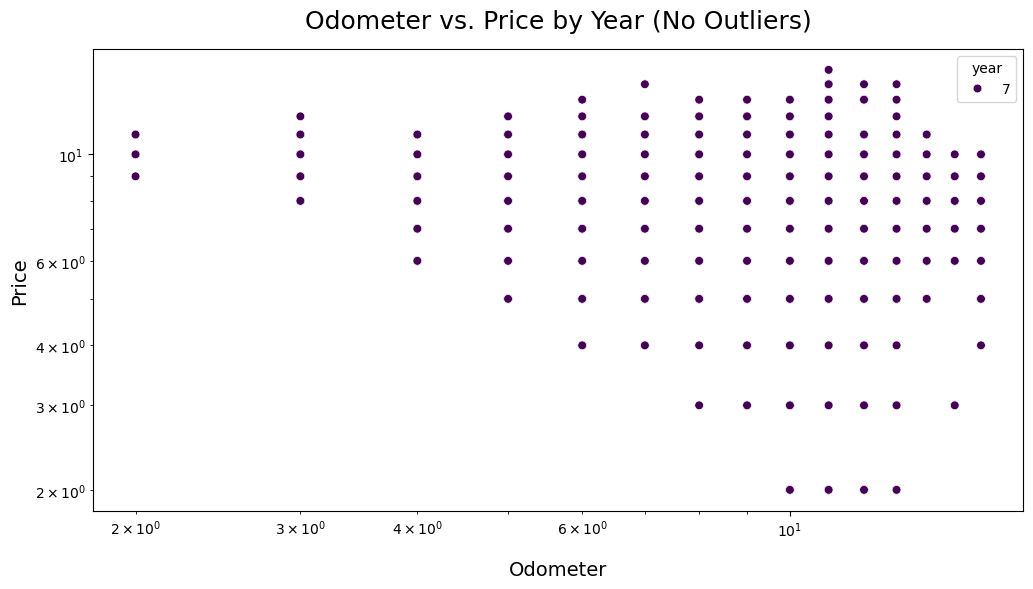

In [103]:
plt.figure(figsize=(12,6))
plt.title('Odometer vs. Price by Year (No Outliers)', fontsize=18, pad=15)
sns.scatterplot(data=df_no_outliers_pca_copy, y='price', x='odometer', hue='year', palette='viridis', s=40, alpha=1)
plt.xlabel('Odometer', fontsize=14, labelpad=15)
plt.ylabel('Price', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./images/scatter_plot_pca_no_outliers.png')
plt.show()


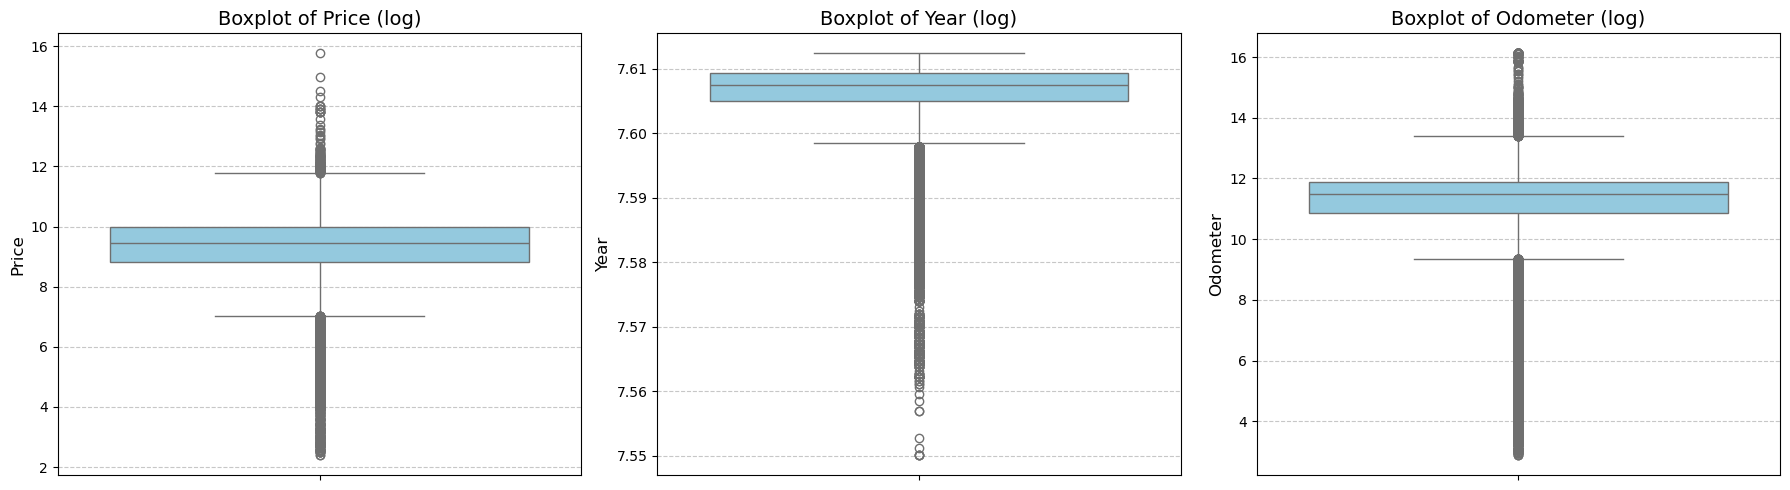

In [107]:
# Select numerical columns for outlier detection
numerical_columns = ["price", "year", "odometer"]

# Set figure size for side-by-side comparison
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Create boxplots for detecting outliers side by side
for i, column in enumerate(numerical_columns):
    sns.boxplot(y=df_no_outliers_pca[column], color="skyblue", ax=axes[i])
    axes[i].set_title(f"Boxplot of {column.capitalize()} (log)", fontsize=14)
    axes[i].set_ylabel(column.capitalize(), fontsize=12)
    axes[i].grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('./images/boxplot_outliers.png')
plt.show()


**Price Distribution (Price Boxplot)**

- There are many outliers in high-price values (luxury or premium cars).
- The median price is relatively low, suggesting most vehicles are affordable.
- Lower whiskers show some very cheap vehicles (possible salvage or damaged cars).

- Insights:

- Consider removing extreme high-price outliers to prevent misleading data.
- Investigate very low-priced listings for potential fraudulent or misclassified vehicles.

**Year Distribution (Year Boxplot)**

- The majority of vehicles are from the mid to late 2000s.
- Old cars (before 1990s) appear as outliers, possibly classic or vintage cars.
- Newer vehicles (past 2020) might have some anomalies due to incorrect data entries.

- Older cars (pre-1990) should be checked, as they might be incorrectly entered or special cases.

**Odometer Distribution (Odometer Boxplot)**

- The median odometer reading is moderate, but many high-mileage vehicles exist.
- High-mileage outliers (>300,000 miles) suggest either:

- Extreme odometer readings should be reviewed to detect possible incorrect entries.
- Very low-mileage listings should be verified as potential new vehicle misclassifications

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

## Linear Regression model (Odometer vs Price)

In [110]:
#Remove outliers for better visualization
cars_no_outliers = df_usedCar[df_usedCar['price'] < df_usedCar['price'].quantile(0.99)]  #inspecting 99% of the 'price' data
cars_no_outliers = cars_no_outliers[cars_no_outliers['year'] < cars_no_outliers['price'].quantile(0.99)]  #inspecting 99% of the 'year' data
cars_no_outliers = cars_no_outliers[cars_no_outliers['odometer'] < cars_no_outliers['odometer'].quantile(0.99)]  #inspecting 99% of the 'odometer' data


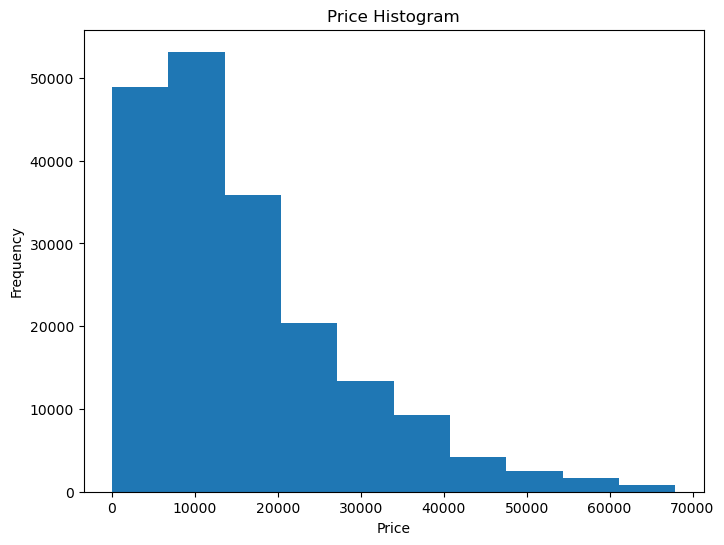

In [111]:
#Histogram of Price
plt.figure(figsize=(8, 6))
plt.hist(cars_no_outliers['price'])
plt.title('Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [286]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the cleaned dataset
# Assuming df_cleaned is already available

# Splitting data into training and testing sets
#X = df_no_outliers_pca[['odometer']]
#y = df_no_outliers_pca['price']

X = cars_no_outliers[['year']]
y = cars_no_outliers['price']

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [288]:
# Creating a pipeline with standard scaling and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])


In [289]:
# Fitting the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [290]:
# Making predictions
y_pred = pipeline.predict(X_test)

In [291]:
cars_no_outliers.head()

price  year manufacturer                     model  condition  \
27  33590  2014          gmc  sierra 1500 crew cab slt       good   
28  22590  2010    chevrolet            silverado 1500       good   
29  39590  2020    chevrolet       silverado 1500 crew       good   
30  30990  2017       toyota      tundra double cab sr       good   
31  15000  2013         ford                 f-150 xlt  excellent   

      cylinders fuel  odometer title_status transmission         drive  \
27  8 cylinders  gas     57923        clean        other  Notspecified   
28  8 cylinders  gas     71229        clean        other  Notspecified   
29  8 cylinders  gas     19160        clean        other  Notspecified   
30  8 cylinders  gas     41124        clean        other  Notspecified   
31  6 cylinders  gas    128000        clean    automatic           rwd   

      type paint_color state  
27  pickup       white    al  
28  pickup        blue    al  
29  pickup         red    al  
30  pickup         red    al  
31   truck       black    al

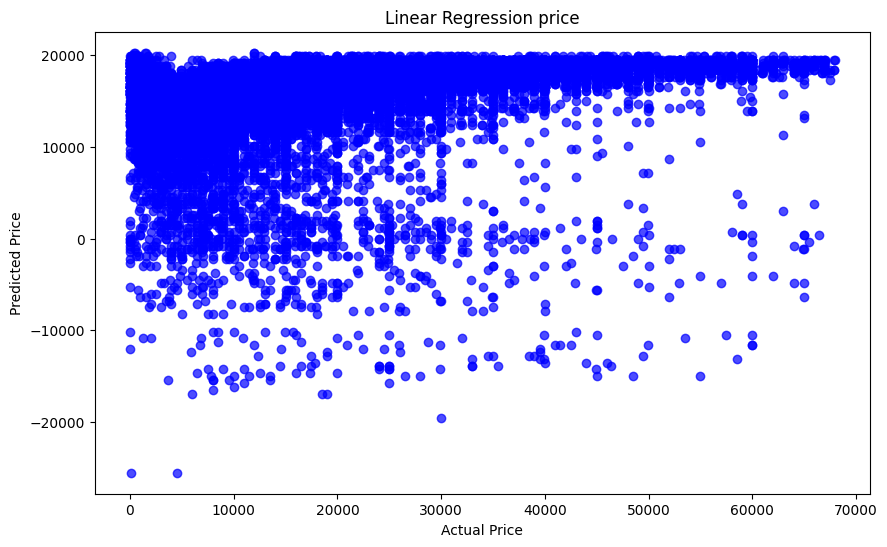

In [292]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.title('Linear Regression price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()


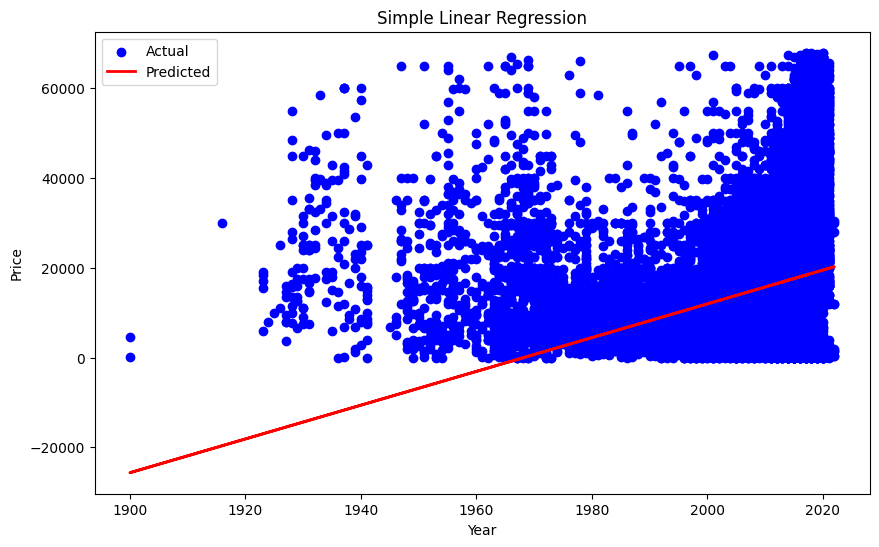

In [293]:
# Simple Linear Regression on Year
X_lr = cars_no_outliers[['year']]
X_train, X_test, y_train, y_test = train_test_split(X_lr, y, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_lr, color='red', linewidth=2, label='Predicted')
plt.title('Simple Linear Regression')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()


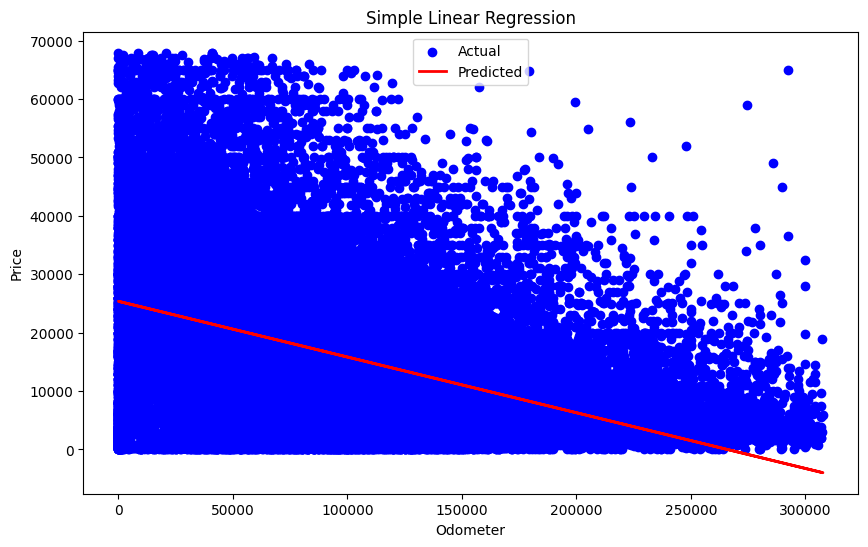

In [294]:
# Simple Linear Regression on Odometer (better values in the correlation matrix)
X_lr = cars_no_outliers[['odometer']]
X_train, X_test, y_train, y_test = train_test_split(X_lr, y, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_lr, color='red', linewidth=2, label='Predicted')
plt.title('Simple Linear Regression')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.legend()

plt.show()

In [295]:
#Calculate MSE of Simple Linear Regression - Odometer
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"Simple Linear Regression RMSE - Odometer = {lr_rmse}")

Simple Linear Regression RMSE - Odometer = 10868.829256041874


In [296]:
df_no_outliers_pca.shape

(188010, 15)

In [297]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the cleaned dataset
# Assuming df_cleaned is already available

# Splitting data into training and testing sets
#X = df_no_outliers_pca[['odometer']]
#y = df_no_outliers_pca['price']

X = df_no_outliers_pca[['year']]
y = df_no_outliers_pca['price']

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [299]:
# Creating a pipeline with standard scaling and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])



In [300]:
# Fitting the model
pipeline.fit(X_train, y_train)



Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [301]:
# Making predictions
y_pred = pipeline.predict(X_test)

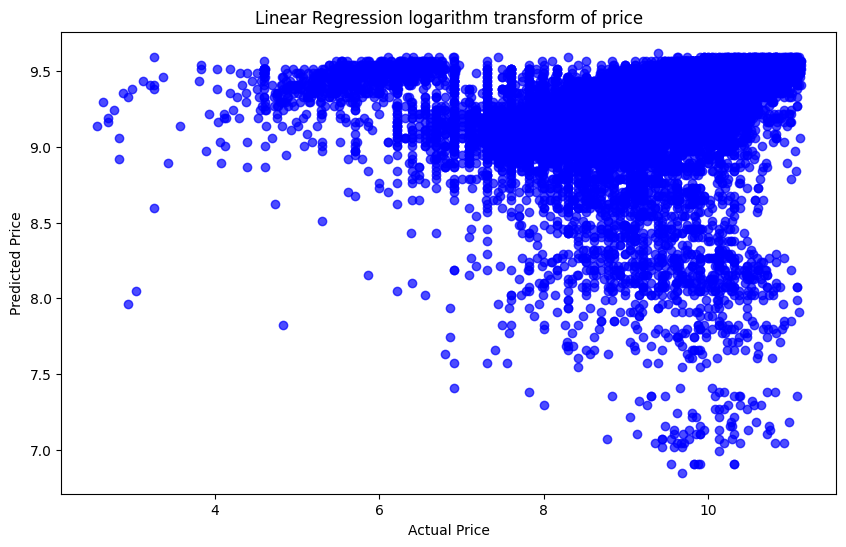

In [302]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.title('Linear Regression logarithm transform of price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

### Multiple Linear Regression Model

In [303]:
cars_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190069 entries, 27 to 426838
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         190069 non-null  Int64 
 1   year          190069 non-null  Int64 
 2   manufacturer  190069 non-null  string
 3   model         190069 non-null  string
 4   condition     190069 non-null  string
 5   cylinders     190069 non-null  string
 6   fuel          190069 non-null  string
 7   odometer      190069 non-null  Int64 
 8   title_status  190069 non-null  string
 9   transmission  190069 non-null  string
 10  drive         190069 non-null  string
 11  type          190069 non-null  string
 12  paint_color   190069 non-null  string
 13  state         190069 non-null  string
dtypes: Int64(3), string(11)
memory usage: 22.3 MB


In [304]:
#df_train = df_no_outliers_pca.copy()
df_train = cars_no_outliers.copy()
#df_train['price'] = cars_no_outliers['price'].astype(int)
#df_train['odometer'] = cars_no_outliers['odometer'].astype(int)
#df_train['year'] = cars_no_outliers['year'].astype(int)
#df_train['Mahalanobis_Distance'] = cars_no_outliers['Mahalanobis_Distance'].astype(int)

In [305]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190069 entries, 27 to 426838
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         190069 non-null  Int64 
 1   year          190069 non-null  Int64 
 2   manufacturer  190069 non-null  string
 3   model         190069 non-null  string
 4   condition     190069 non-null  string
 5   cylinders     190069 non-null  string
 6   fuel          190069 non-null  string
 7   odometer      190069 non-null  Int64 
 8   title_status  190069 non-null  string
 9   transmission  190069 non-null  string
 10  drive         190069 non-null  string
 11  type          190069 non-null  string
 12  paint_color   190069 non-null  string
 13  state         190069 non-null  string
dtypes: Int64(3), string(11)
memory usage: 22.3 MB


In [306]:
df_train.head()


price  year manufacturer                     model  condition  \
27  33590  2014          gmc  sierra 1500 crew cab slt       good   
28  22590  2010    chevrolet            silverado 1500       good   
29  39590  2020    chevrolet       silverado 1500 crew       good   
30  30990  2017       toyota      tundra double cab sr       good   
31  15000  2013         ford                 f-150 xlt  excellent   

      cylinders fuel  odometer title_status transmission         drive  \
27  8 cylinders  gas     57923        clean        other  Notspecified   
28  8 cylinders  gas     71229        clean        other  Notspecified   
29  8 cylinders  gas     19160        clean        other  Notspecified   
30  8 cylinders  gas     41124        clean        other  Notspecified   
31  6 cylinders  gas    128000        clean    automatic           rwd   

      type paint_color state  
27  pickup       white    al  
28  pickup        blue    al  
29  pickup         red    al  
30  pickup         red    al  
31   truck       black    al

In [307]:
# Convert numerical columns to integer
df_train['year'] = df_train['year'].astype(int)
df_train['odometer'] = df_train['odometer'].astype(int)
df_train['price'] = df_train['price'].astype(int)


In [308]:
# Identify the X independent variables and y dependent variable
x_columns = ['year', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer',
             'transmission', 'drive', 'type', 'paint_color', 'state']
x_num_columns = [col for col in x_columns if df_train[col].dtype in ['int', 'Float64']]
x_cat_columns = [col for col in x_columns if df_train[col].dtype in ['object', 'category', 'string']]
y_column = ['price']

In [309]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190069 entries, 27 to 426838
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         190069 non-null  int64 
 1   year          190069 non-null  int64 
 2   manufacturer  190069 non-null  string
 3   model         190069 non-null  string
 4   condition     190069 non-null  string
 5   cylinders     190069 non-null  string
 6   fuel          190069 non-null  string
 7   odometer      190069 non-null  int64 
 8   title_status  190069 non-null  string
 9   transmission  190069 non-null  string
 10  drive         190069 non-null  string
 11  type          190069 non-null  string
 12  paint_color   190069 non-null  string
 13  state         190069 non-null  string
dtypes: int64(3), string(11)
memory usage: 21.8 MB


In [310]:
# Review our X and y columns
print("X columns: ", x_columns)
print("X numeric columns: ", x_num_columns)
print("X categorical columns: ", x_cat_columns)
print("y column: ", y_column)

X columns:  ['year', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'type', 'paint_color', 'state']
X numeric columns:  ['year', 'odometer']
X categorical columns:  ['manufacturer', 'condition', 'cylinders', 'fuel', 'transmission', 'drive', 'type', 'paint_color', 'state']
y column:  ['price']


In [311]:
# Separate cleaned dataframe with no outliers into X and y, requires encoding in Pipeline
X = pd.DataFrame.copy(df_train[x_columns])
y = pd.DataFrame.copy(df_train[y_column])

In [312]:
print("X, y shapes: ", X.shape, y.shape)

X, y shapes:  (190069, 11) (190069, 1)


### Training, Validation and Test Splits

In [313]:
# Create training and test datasets, if cross-validation strategy derives the validation set from training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [314]:
# Verify train/test split
#X_train.info(), X_test.info(), y_train.info(), y_test.info()
print("X, y train/test shapes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X, y train/test shapes:  (152055, 11) (38014, 11) (152055, 1) (38014, 1)


### Baseline

In [315]:
# Create a baseline of same shape as y_train and y_test populated with their means as values
baseline_train = np.ones(shape=y_train.shape) * y_train.iloc[:, 0].mean()
baseline_test = np.ones(shape=y_test.shape) * y_test.iloc[:, 0].mean()

In [316]:
from sklearn.compose import make_column_transformer, ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, RobustScaler
# Create a column transformer to apply one-hot to selected variables
col_transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), x_cat_columns),
                                          remainder='passthrough')

# Create a Pipeline for data processing with one-hot encoding
pipe = Pipeline([
    ('ohe', col_transformer),
    ('linreg', LinearRegression())
])

### Fit the model

In [317]:
# Train the model using our training data
pipe.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['manufacturer', 'condition',
                                                   'cylinders', 'fuel',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color',
                                                   'state'])])),
                ('linreg', LinearRegression())])

### Prediction

In [318]:
# Predict y from our test dataset
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

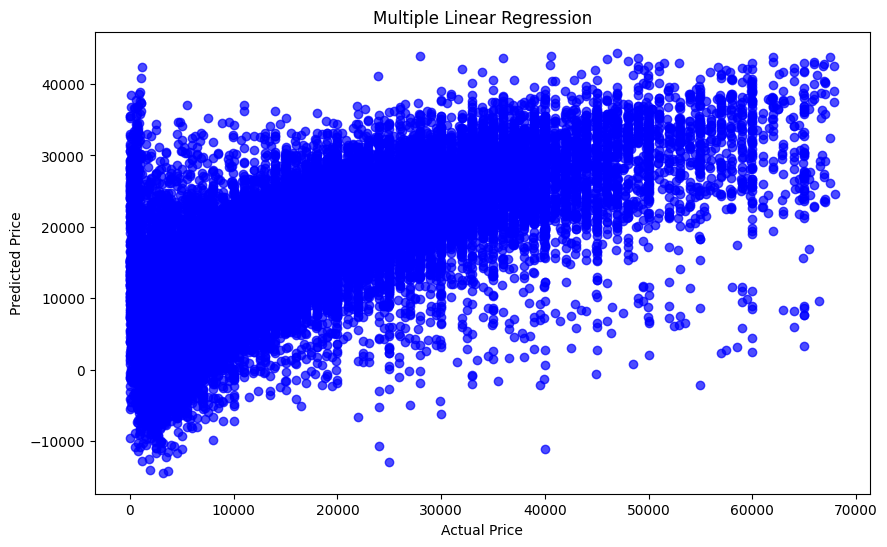

In [319]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='blue')
plt.title('Multiple Linear Regression')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [320]:
#Calculate MSE of Multiple Linear Regression
m_lr_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Multiple Linear Regression RMSE = {m_lr_rmse}")

Multiple Linear Regression RMSE = 8752.862233595042


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Evalution Multiple Linear regression

In [322]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Evaluate baseline MSE, RMSE, MAE, and R^2 score
baseline_train_mse = mean_squared_error(y_train, baseline_train)
baseline_test_mse = mean_squared_error(y_test, baseline_test)
baseline_train_mae = mean_absolute_error(y_train, baseline_train)
baseline_test_mae = mean_absolute_error(y_test, baseline_test)
baseline_train_r2 = r2_score(y_train, baseline_train)
baseline_test_r2 = r2_score(y_test, baseline_test)
print(f'Baseline Train MSE: {baseline_train_mse: ,.0f}')
print(f'Baseline Test MSE: {baseline_test_mse: ,.0f}')
print(f'Baseline Train RMSE: {np.sqrt(baseline_train_mse): ,.0f}')
print(f'Baseline Test RMSE: {np.sqrt(baseline_test_mse): ,.0f}')
print(f'Baseline Train MAE: {baseline_train_mae: ,.0f}')
print(f'Baseline Test MAE: {baseline_test_mae: ,.0f}')
print(f'Baseline Train R^2 Score: {baseline_train_r2: ,.2f}')
print(f'Baseline Test R^2 Score: {baseline_test_r2: ,.2f}')

Baseline Train MSE:  153,042,943
Baseline Test MSE:  151,437,514
Baseline Train RMSE:  12,371
Baseline Test RMSE:  12,306
Baseline Train MAE:  9,655
Baseline Test MAE:  9,602
Baseline Train R^2 Score:  0.00
Baseline Test R^2 Score:  0.00


### Model Performance

In [324]:
# Evaluate model MSE, RMSE, MAE and R^2 score
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'Model Train MSE: {train_mse: ,.0f}')
print(f'Model Test MSE: {test_mse: ,.0f}')
print(f'Model Train RMSE: {np.sqrt(train_mse): ,.0f}')
print(f'Model Test RMSE: {np.sqrt(test_mse): ,.0f}')
print(f'Model Train MAE: {train_mae: ,.0f}')
print(f'Model Test MAE: {test_mae: ,.0f}')
print(f'Model Train R^2 Score: {train_r2: ,.2f}')
print(f'Model Test R^2 Score: {test_r2: ,.2f}')

Model Train MSE:  77,356,247
Model Test MSE:  76,612,597
Model Train RMSE:  8,795
Model Test RMSE:  8,753
Model Train MAE:  6,213
Model Test MAE:  6,166
Model Train R^2 Score:  0.49
Model Test R^2 Score:  0.49


We have an R&sup2; score on the Test dataset of 0.38. This shows that about 38% of the variance is accounted for by the model.

In [325]:
# Set dataframe output to not show scientific notation
pd.set_option('display.float_format', '{:.4f}'.format)

### Model Iteration

In [326]:
# Select relevant features and target variable
features= ['year', 'odometer', 'cylinders', 'manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']
X_cars = pd.get_dummies(df_train[features], drop_first=True)
y_cars = df_train['price']

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_cars, y_cars, test_size=0.3, random_state=42)
print(X_test_orig)

        year  odometer  cylinders_12 cylinders  cylinders_3 cylinders  \
74419   2013     88302                   False                  False   
234727  2015    120850                   False                  False   
171750  2003    128532                   False                  False   
22845   2014     42830                   False                  False   
33448   2016     57000                   False                  False   
...      ...       ...                     ...                    ...   
398660  2008    115800                   False                  False   
334835  2012    151000                   False                  False   
98293   2002    168895                   False                  False   
55775   2012         2                   False                  False   
81978   2017     89528                   False                  False   

        cylinders_4 cylinders  cylinders_5 cylinders  cylinders_6 cylinders  \
74419                   False               

In [327]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cars)

In [328]:
# Split into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cars, test_size=0.3, random_state=42)
print(f"Training set size: {len(X_train)}, Testing set size: {len(X_test)}")

Training set size: 133048, Testing set size: 57021


In [329]:
#Principal Component Analysis (PCA)
pca = PCA(n_components=0.95)  # Variance = 95%
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [330]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

#Sequential Feature Selection (SFS)
cars_model = LinearRegression()
sfs = SequentialFeatureSelector(cars_model, n_features_to_select=10, direction='forward')
sfs.fit(X_train_pca, y_train)
X_train_sfs = sfs.transform(X_train_pca)
X_test_sfs = sfs.transform(X_test_pca)

In [331]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
# Hyperparameter tuning for Ridge and Lasso
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
ridge = GridSearchCV(Ridge(), param_grid, cv=5)
lasso = GridSearchCV(Lasso(), param_grid, cv=5)

In [332]:
# Train Ridge Regression
ridge.fit(X_train_sfs, y_train)
y_pred_ridge = ridge.predict(X_test_sfs)

In [333]:
# Train Lasso Regression
lasso.fit(X_train_sfs, y_train)
y_pred_lasso = lasso.predict(X_test_sfs)

In [334]:
# Evaluate Ridge Regression
mae_ridge = mean_absolute_error(y_test, y_pred_ridge) #MAE score evaluation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)  #MSE score evaluation
rmse_ridge = np.sqrt(mse_ridge)  #RMSE score evaluation
r2_ridge = r2_score(y_test, y_pred_ridge)  #R2 score evaluation
print(f'Ridge - Mean Absolute Error (MAE): {mae_ridge}')
print(f'Ridge - Mean Squared Error (MSE): {mse_ridge}')
print(f'Ridge - Root Mean Squared Error (RMSE): {rmse_ridge}')
print(f'Ridge - R-squared (R2): {r2_ridge}')

Ridge - Mean Absolute Error (MAE): 7314.280064407188
Ridge - Mean Squared Error (MSE): 97397107.0094697
Ridge - Root Mean Squared Error (RMSE): 9868.997264639893
Ridge - R-squared (R2): 0.3649940734431999


In [335]:
# Evaluate Lasso Regression
mae_lasso = mean_absolute_error(y_test, y_pred_lasso) #MAE score evaluation
mse_lasso = mean_squared_error(y_test, y_pred_lasso)  #MSE score evaluation
rmse_lasso = np.sqrt(mse_lasso)  #RMSE score evaluation
r2_lasso = r2_score(y_test, y_pred_lasso) #R2 score evaluation
print(f'Lasso - Mean Absolute Error (MAE): {mae_lasso}')
print(f'Lasso - Mean Squared Error (MSE): {mse_lasso}')
print(f'Lasso - Root Mean Squared Error (RMSE): {rmse_lasso}')
print(f'Lasso - R-squared (R2): {r2_lasso}')

Lasso - Mean Absolute Error (MAE): 7314.300525221436
Lasso - Mean Squared Error (MSE): 97397074.92183425
Lasso - Root Mean Squared Error (RMSE): 9868.995638961153
Lasso - R-squared (R2): 0.36499428264693623


<ipython-input-336-d1ad6dd6bca5>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


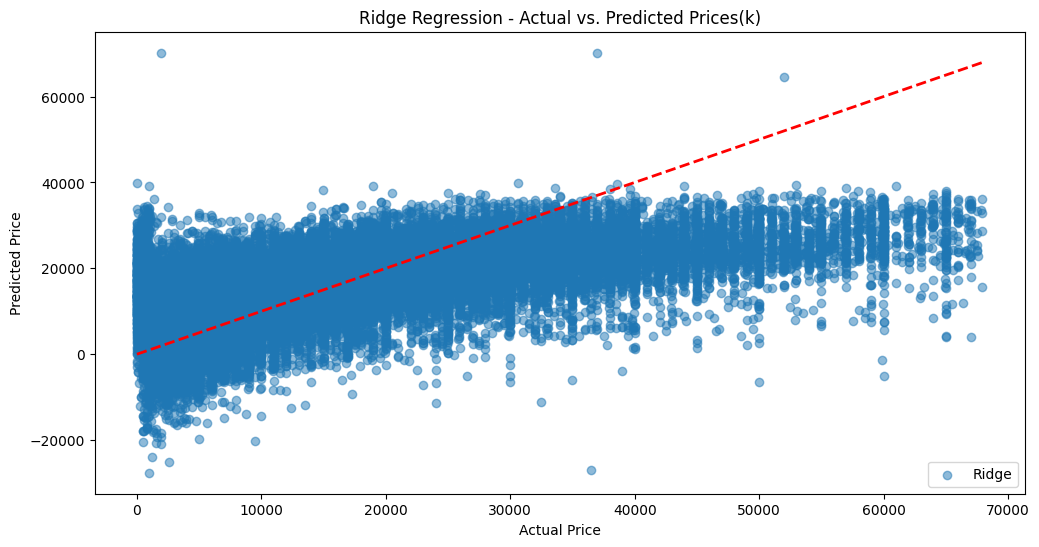

<Figure size 640x480 with 0 Axes>

In [336]:
# Plot the actual vs. predicted prices - Ridge Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5, label='Ridge')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Ridge Regression - Actual vs. Predicted Prices(k)')
plt.legend()
plt.show()
plt.savefig('cars_ridge_regression_plot.png')

<ipython-input-337-ac888eeb27ee>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


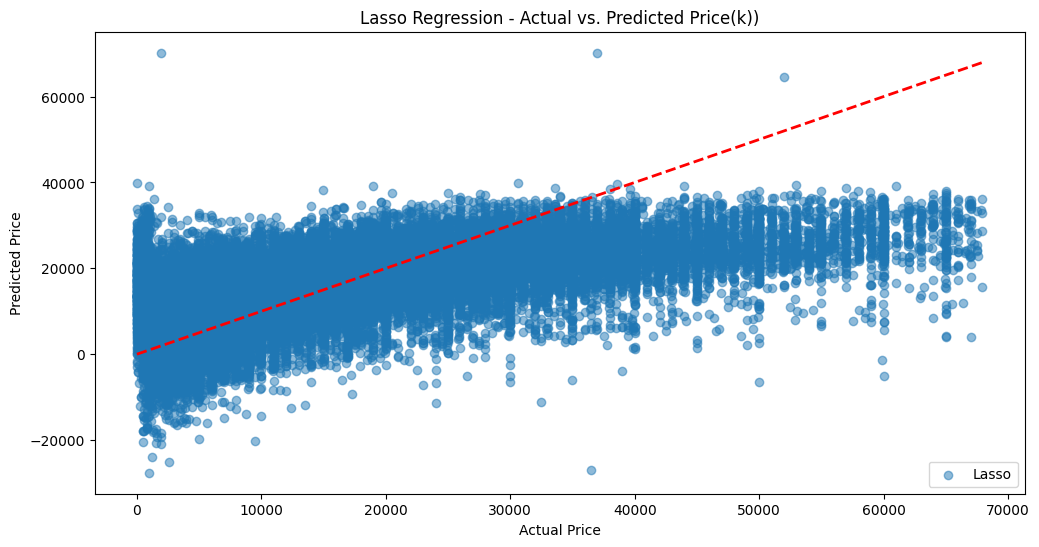

In [337]:
# Plot the actual vs. predicted prices - Lasso Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5, label='Lasso')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Lasso Regression - Actual vs. Predicted Price(k))')
plt.legend()

plt.show()

In [338]:
from tabulate import tabulate
#Create a list of dictionaries with the model results - Ridge and Lasso
model_results = [
    {
        "Model Type": "Ridge",
        "MAE"       : mae_ridge,
        "MSE"       : mse_ridge,
        "RMSE"      : rmse_ridge,
        "R2"        : r2_ridge
    },
    {
        "Model Type": "Lasso",
        "MAE"       : mae_lasso,
        "MSE"       : mse_lasso,
        "RMSE"      : rmse_lasso,
        "R2"        : r2_lasso
    }
]

# Convert the list of dictionaries to a DataFrame
df1 = pd.DataFrame(model_results)

# Print the DataFrame as a formatted table with borders
print(tabulate(df1, headers='keys', tablefmt='grid'))

+----+--------------+---------+-------------+--------+----------+
|    | Model Type   |     MAE |         MSE |   RMSE |       R2 |
+====+==============+=========+=============+========+==========+
|  0 | Ridge        | 7314.28 | 9.73971e+07 |   9869 | 0.364994 |
+----+--------------+---------+-------------+--------+----------+
|  1 | Lasso        | 7314.3  | 9.73971e+07 |   9869 | 0.364994 |
+----+--------------+---------+-------------+--------+----------+


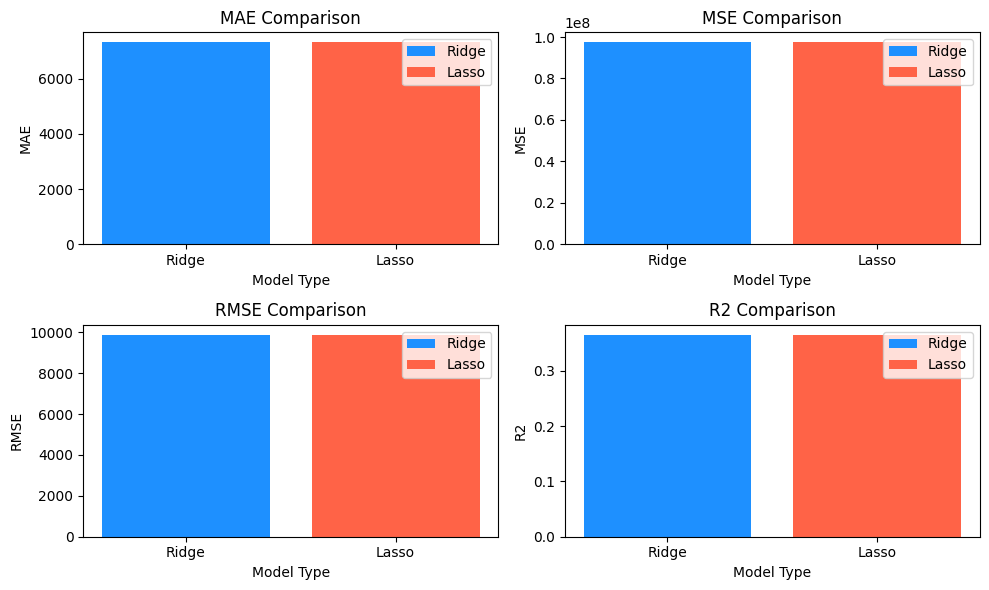

In [339]:
#Plot Model Results
# Plotting individual metrics
plt.figure(figsize=(10, 6))

# Define colors for the bars
colors = ['#1E90FF', '#FF6347']  # Dodger Blue and Tomato Red

# List of metrics to plot
metrics = ['MAE', 'MSE', 'RMSE', 'R2']

# Create subplots for each metric
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)

    # Plot bars with different colors for each model type
    for j, model in enumerate(df1['Model Type']):
        plt.bar(model, df1.loc[df1['Model Type'] == model, metric].values[0],
                color=colors[j],
                label=model)

    plt.title(f'{metric} Comparison')
    plt.ylabel(metric)
    plt.xlabel('Model Type')
    plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
#plt.savefig('cars_model_results_plot.png')
#plt.savefig('../images/cars_model_results_plot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [340]:
# Check the type and shape of y_test
print("Type of y_test:", type(y_test))
print("Shape of y_test:", y_test.shape)

# Check the type and shape of y_pred_ridge
print("Type of y_pred_ridge:", type(y_pred_ridge))
print("Shape of y_pred_ridge:", y_pred_ridge.shape)

# Check the type and shape of X_test
print("Type of X_test:", type(X_test))
print("Shape of X_test:", X_test.shape)

# Check if X_test has named fields (structured array)
if isinstance(X_test, np.ndarray) and X_test.dtype.names:
    print("X_test has named columns:", X_test.dtype.names)
else:
    print("X_test does not have named columns")

Type of y_test: <class 'pandas.core.series.Series'>
Shape of y_test: (57021,)
Type of y_pred_ridge: <class 'numpy.ndarray'>
Shape of y_pred_ridge: (57021,)
Type of X_test: <class 'numpy.ndarray'>
Shape of X_test: (57021, 100)
X_test does not have named columns


In [352]:
print(len(column_names))


13


In [358]:
print('y_test shape:', y_test.shape)
print('y_pred_ridge shape:', y_pred_ridge.shape)
print('X_test_orig shape:', X_test_orig.shape)




y_test shape: (57021,)
y_pred_ridge shape: (57021,)
X_test_orig shape: (57021, 100)


In [359]:


temp_df = pd.DataFrame(combined_array)
print(temp_df.head())


     0          1     2       3      4      5      6      7      8      9    \
0  19999 14587.5850  2013   88302  False  False  False  False   True  False   
1  13900 16999.0332  2015  120850  False  False  False  False  False  False   
2   5495  9006.9030  2003  128532  False  False  False  False   True  False   
3  12990 20316.6432  2014   42830  False  False  False  False  False  False   
4  10500 11458.9849  2016   57000  False  False  False  False   True  False   

   ...    92     93     94     95     96     97     98     99     100    101  
0  ...  False   True  False  False  False  False  False  False  False  False  
1  ...  False  False  False  False  False  False  False  False  False  False  
2  ...  False  False  False  False  False  False  False  False  False  False  
3  ...  False  False  False  False  False  False  False  False  False  False  
4  ...   True  False  False  False  False  False  False  False  False  False  

[5 rows x 102 columns]


In [354]:
# Combine the three arrays horizontally (side by side) - actual price, predicted price and features
combined_array = np.column_stack((y_test, y_pred_ridge, X_test_orig))

In [355]:
print(combined_array.shape)


(57021, 102)


In [367]:
# Create DataFrame directly
cars_df = pd.DataFrame({
    'actual_price': y_test_orig.reset_index(drop=True),
    'predicted_price': y_pred_ridge.flatten(),
})

# Now concatenate your dummy-encoded features clearly
X_test_orig_reset = X_test_orig.reset_index(drop=True)
cars_df = pd.concat([cars_df, X_test_orig_reset], axis=1)

# Display to confirm correctness
print(cars_df.head(10))


   actual_price  predicted_price  year  odometer  cylinders_12 cylinders  \
0         19999       14587.5850  2013     88302                   False   
1         13900       16999.0332  2015    120850                   False   
2          5495        9006.9030  2003    128532                   False   
3         12990       20316.6432  2014     42830                   False   
4         10500       11458.9849  2016     57000                   False   
5         10000       24256.7140  2009     73533                   False   
6         10900       11777.6749  2008     98000                   False   
7         15953       19728.1159  2009     67586                   False   
8         19985       11629.2543  2020     13751                   False   
9         46990       17800.8783  2020         6                   False   

   cylinders_3 cylinders  cylinders_4 cylinders  cylinders_5 cylinders  \
0                  False                  False                  False   
1              

In [361]:
# Combine the three arrays horizontally (side by side) - actual price, predicted price and features
combined_array = np.column_stack((y_test, y_pred_ridge, X_test_orig))  #using the X_test original data before Modeling  (named X_test_orig)

# Specify Column Names
column_names = ['actual_price', 'predicted_price', 'year', 'odometer', 'cylinders', 'manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color'] + [f'Feature_{i}' for i in range(1, 90)]
#column_names = ['Actual_Price', 'Predicted_Price'] + [f'Feature_{i}' for i in range(1, 101)]
cars_df = pd.DataFrame(combined_array, columns=column_names)
# Create a DataFrame
cars_df = pd.DataFrame(combined_array, columns = column_names)

# Convert numerical columns to integer
cars_df['year'] = cars_df['year'].astype(int)
cars_df['odometer'] = cars_df['odometer'].astype(int)
cars_df['cylinders'] = cars_df['cylinders'].astype(int)

# Display the DataFrame
cars_df.head(10)

actual_price predicted_price  year  odometer  cylinders manufacturer  \
0        19999      14587.5850  2013     88302          0        False   
1        13900      16999.0332  2015    120850          0        False   
2         5495       9006.9030  2003    128532          0        False   
3        12990      20316.6432  2014     42830          0        False   
4        10500      11458.9849  2016     57000          0        False   
5        10000      24256.7140  2009     73533          0        False   
6        10900      11777.6749  2008     98000          0        False   
7        15953      19728.1159  2009     67586          0        False   
8        19985      11629.2543  2020     13751          0        False   
9        46990      17800.8783  2020         6          0        False   

  condition   fuel title_status transmission  ... Feature_80 Feature_81  \
0     False  False         True        False  ...      False       True   
1     False  False        False        False  ...      False      False   
2     False  False         True        False  ...      False      False   
3     False  False        False        False  ...      False      False   
4     False  False         True        False  ...       True      False   
5     False  False        False        False  ...      False      False   
6     False  False         True        False  ...      False       True   
7     False  False        False         True  ...      False      False   
8      True  False        False        False  ...      False      False   
9     False  False        False        False  ...      False      False   

  Feature_82 Feature_83 Feature_84 Feature_85 Feature_86 Feature_87  \
0      False      False      False      False      False      False   
1      False      False      False      False      False      False   
2      False      False      False      False      False      False   
3      False      False      False      False      False      False   
4      False      False      False      False      False      False   
5      False      False      False      False      False      False   
6      False      False      False      False      False      False   
7      False      False      False      False      False      False   
8      False      False      False      False       True      False   
9      False      False      False      False      False      False   

  Feature_88 Feature_89  
0      False      False  
1      False      False  
2      False      False  
3      False      False  
4      False      False  
5      False      False  
6      False      False  
7      False      False  
8      False      False  
9      False      False  

[10 rows x 102 columns]

In [362]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57021 entries, 0 to 57020
Columns: 102 entries, actual_price to Feature_89
dtypes: int64(3), object(99)
memory usage: 44.4+ MB


In [363]:
# prompt: Convert numerical columns to integer

# Convert numerical columns to integer in df_train
for col in ['price', 'odometer', 'year']:
    if col in df_train.columns:
        df_train[col] = df_train[col].astype(int)


In [344]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190069 entries, 27 to 426838
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         190069 non-null  int64 
 1   year          190069 non-null  int64 
 2   manufacturer  190069 non-null  string
 3   model         190069 non-null  string
 4   condition     190069 non-null  string
 5   cylinders     190069 non-null  string
 6   fuel          190069 non-null  string
 7   odometer      190069 non-null  int64 
 8   title_status  190069 non-null  string
 9   transmission  190069 non-null  string
 10  drive         190069 non-null  string
 11  type          190069 non-null  string
 12  paint_color   190069 non-null  string
 13  state         190069 non-null  string
dtypes: int64(3), string(11)
memory usage: 21.8 MB


<ipython-input-364-700a39a98d11>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


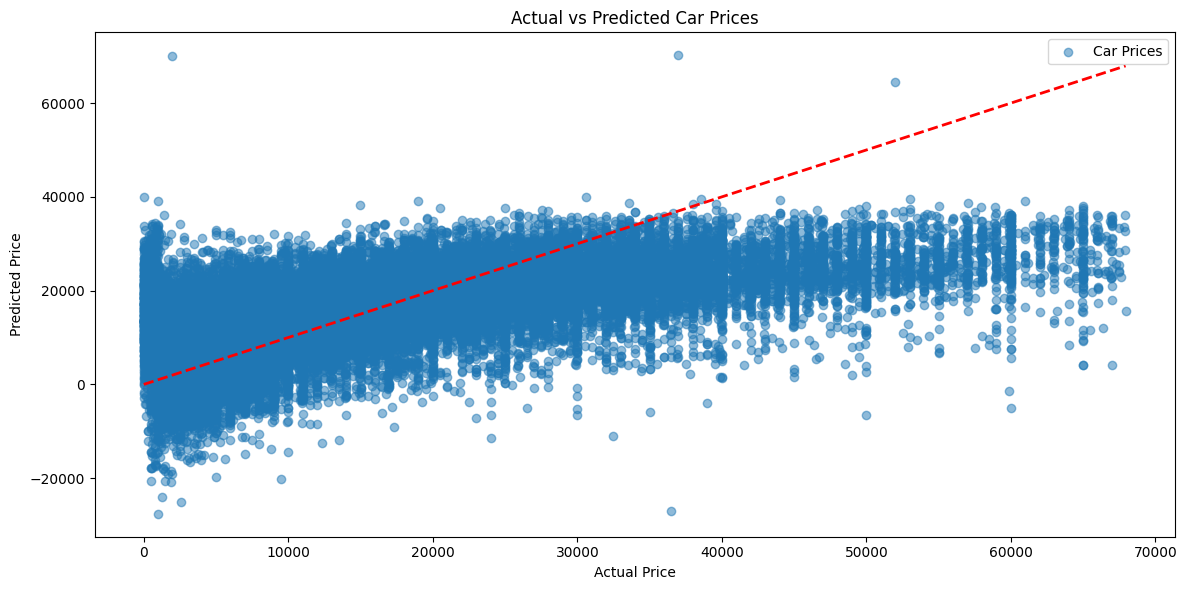

In [364]:
# 1. Scatter Plot: Actual vs Predicted Prices - Using Ridge Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5, label='Car Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.legend()
plt.tight_layout()
#plt.savefig('01_cars_price_scatterplot.png')
#plt.savefig('../images/01_cars_price_scatterplot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

<ipython-input-347-b60f91ee7703>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


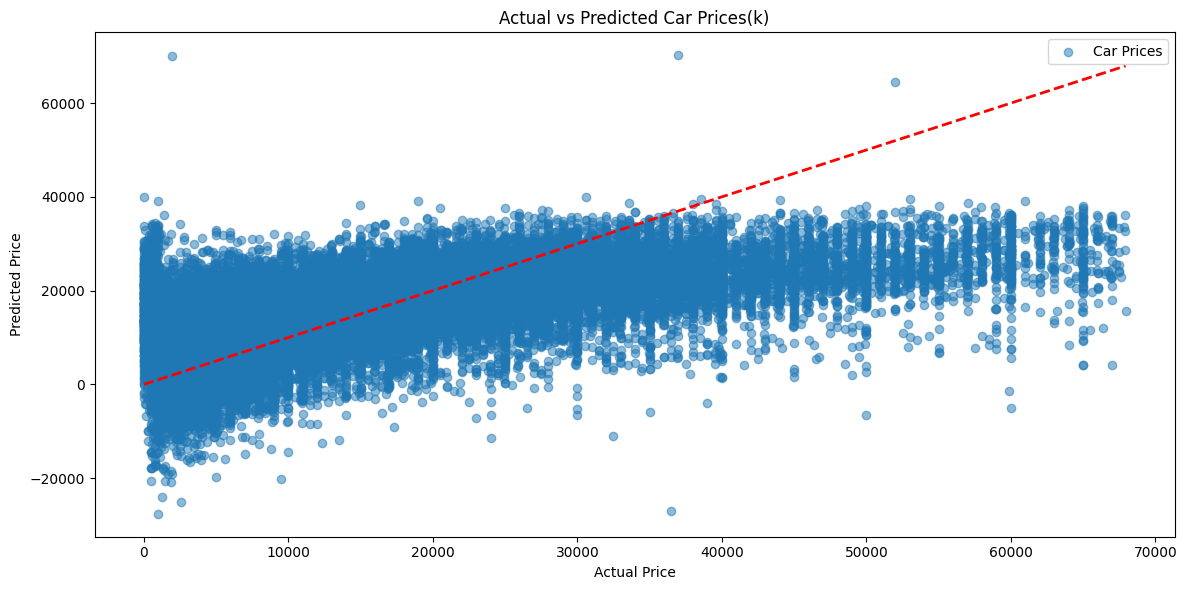

In [347]:
# 1. Scatter Plot: Actual vs Predicted Prices - Using Ridge Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5, label='Car Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices(k)')
plt.legend()
plt.tight_layout()

plt.show()


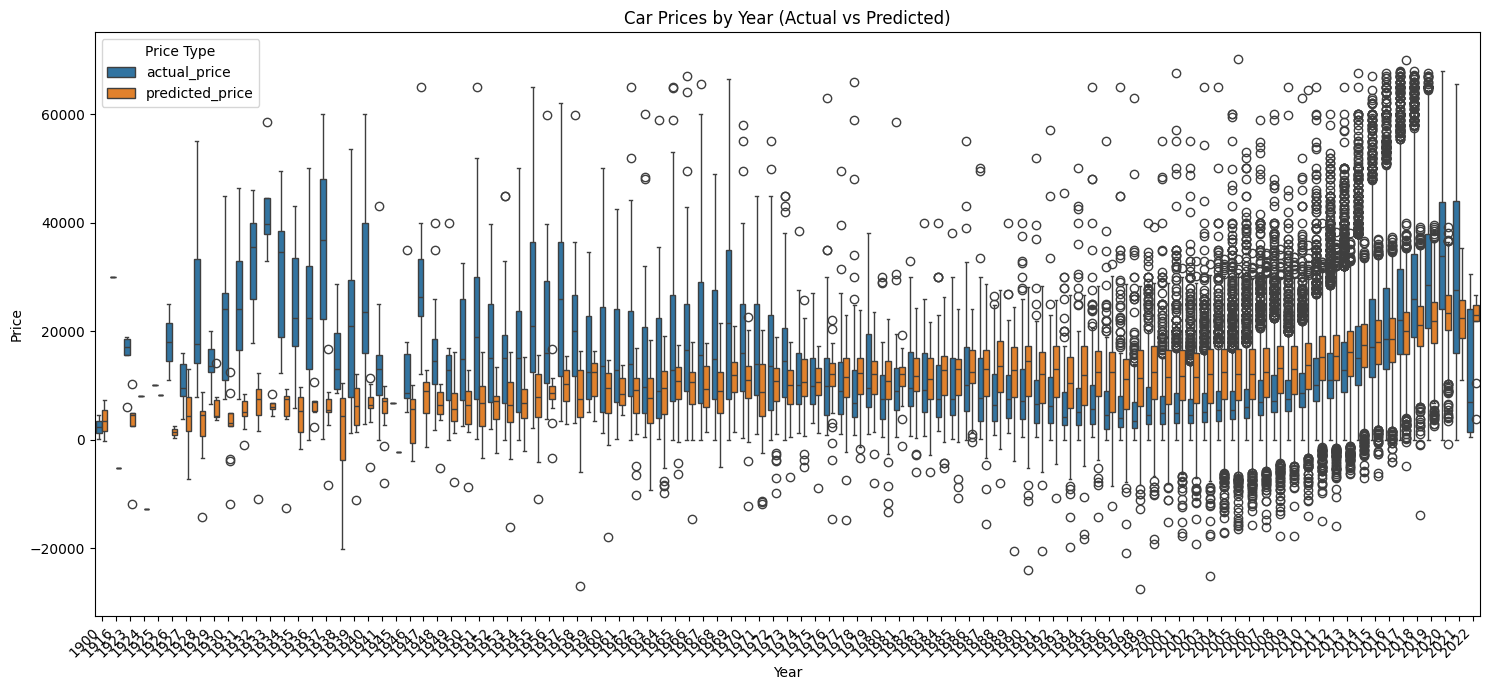

In [366]:
# 2a. Box Plot: Price Distribution by Year
year_prices = pd.melt(cars_df[['year', 'actual_price', 'predicted_price']],
                              id_vars=['year'],
                              value_vars=['actual_price', 'predicted_price'],
                              var_name='Price Type', value_name='Price')

plt.figure(figsize=(15, 7))
sns.boxplot(x='year', y='Price', hue='Price Type', data=year_prices)
plt.title('Car Prices by Year (Actual vs Predicted)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

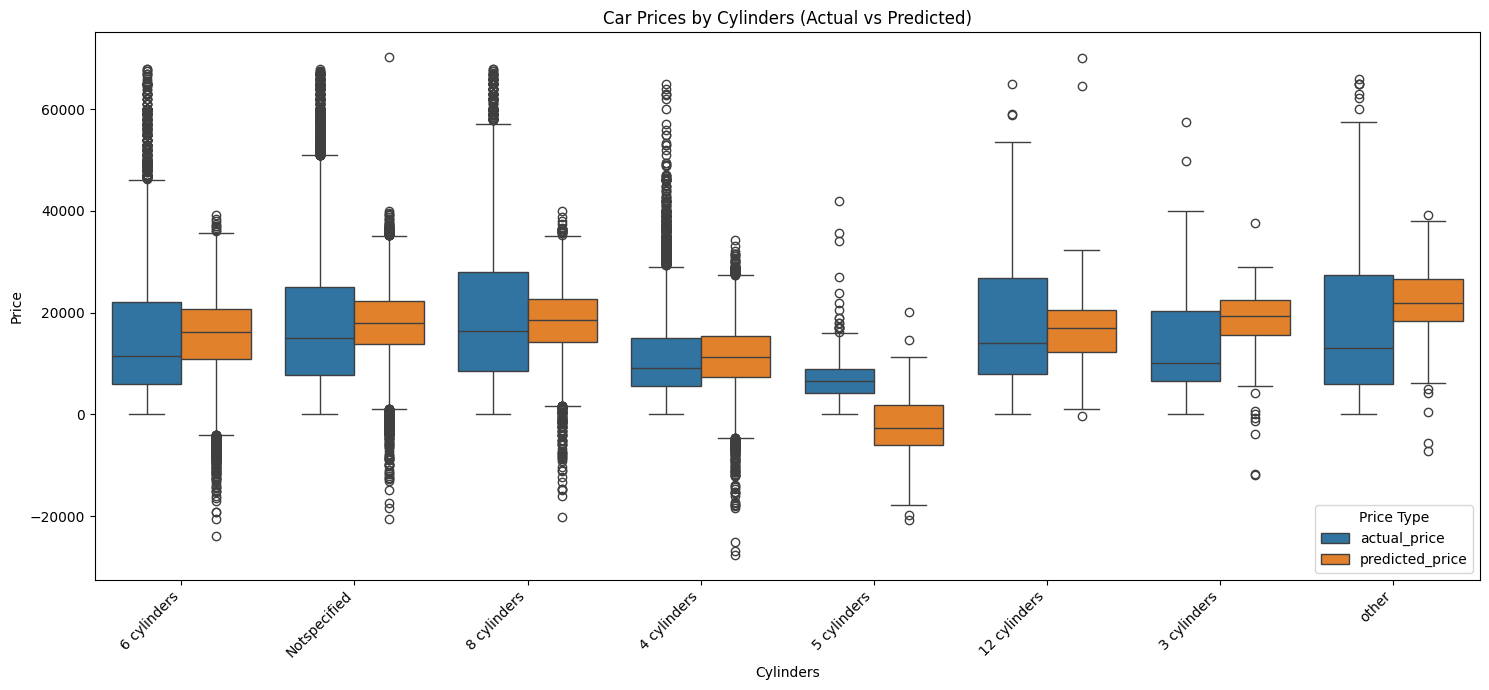

In [370]:
# Reconstruct 'cylinders' column clearly from dummy columns
cylinder_columns = [col for col in cars_df.columns if 'cylinders_' in col]

# Melt the cylinder columns back into a single categorical column
cars_df['cylinders'] = cars_df[cars_df.columns[cars_df.columns.str.startswith('cylinders_')]].idxmax(axis=1)
cars_df['cylinders'] = cars_df['cylinders'].str.replace('cylinders_', '')

# Now melt correctly
year_prices = pd.melt(cars_df[['cylinders', 'actual_price', 'predicted_price']],
                      id_vars=['cylinders'],
                      value_vars=['actual_price', 'predicted_price'],
                      var_name='Price Type', value_name='Price')

# Plotting
plt.figure(figsize=(15, 7))
sns.boxplot(x='cylinders', y='Price', hue='Price Type', data=year_prices)
plt.title('Car Prices by Cylinders (Actual vs Predicted)')
plt.xlabel('Cylinders')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


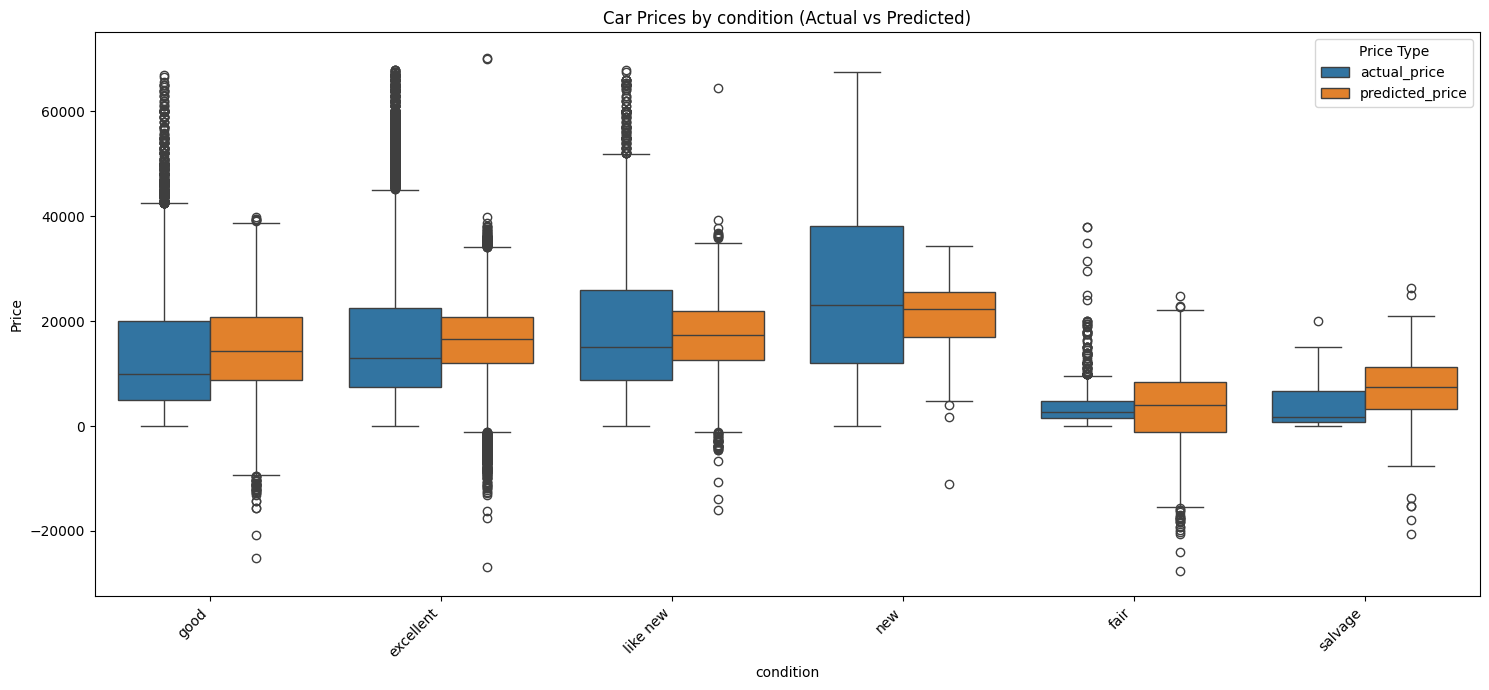

In [374]:
# Reconstruct 'cylinders' column clearly from dummy columns
cylinder_columns = [col for col in cars_df.columns if 'condition_' in col]

# Melt the cylinder columns back into a single categorical column
cars_df['condition'] = cars_df[cars_df.columns[cars_df.columns.str.startswith('condition_')]].idxmax(axis=1)
cars_df['condition'] = cars_df['condition'].str.replace('condition_', '')

# Now melt correctly
year_prices = pd.melt(cars_df[['condition', 'actual_price', 'predicted_price']],
                      id_vars=['condition'],
                      value_vars=['actual_price', 'predicted_price'],
                      var_name='Price Type', value_name='Price')

# Plotting
plt.figure(figsize=(15, 7))
sns.boxplot(x='condition', y='Price', hue='Price Type', data=year_prices)
plt.title('Car Prices by condition (Actual vs Predicted)')
plt.xlabel('condition')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

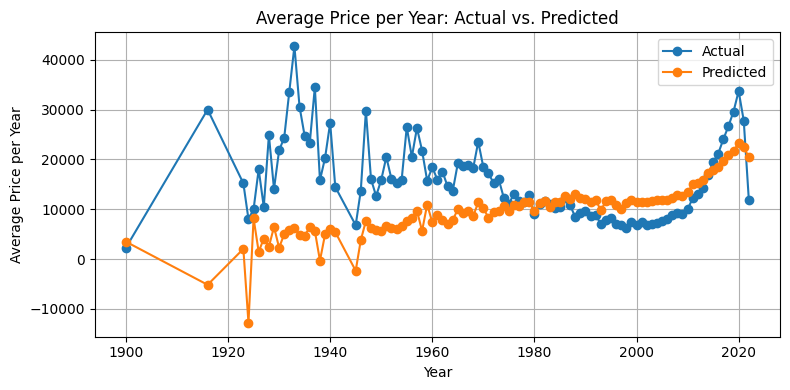

In [375]:
# 3a. Calculate average (mean) price for each year - Actual and Predicted Prices
avg_actual_price_by_year = cars_df.groupby('year')['actual_price'].mean().reset_index()
avg_pred_price_by_year = cars_df.groupby('year')['predicted_price'].mean().reset_index()

plt.figure(figsize=(8, 4))
plt.plot(avg_actual_price_by_year['year'], avg_actual_price_by_year['actual_price'], marker='o', label='Actual') # 'o' adds points at each data point
plt.plot(avg_pred_price_by_year['year'], avg_pred_price_by_year['predicted_price'], marker='o',label='Predicted') # 'o' adds points at each data point
plt.title('Average Price per Year: Actual vs. Predicted')
plt.xlabel('Year')
plt.ylabel('Average Price per Year')
plt.legend()
plt.grid(True)  # adds grid lines
plt.tight_layout()
plt.show()

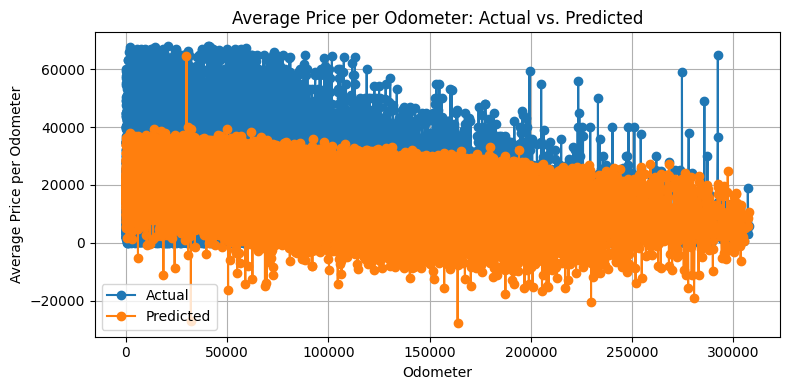

In [376]:
# 3b. Calculate average (mean) price for each range of odometer - Actual and Predicted Prices
avg_actual_price_by_odometer = cars_df.groupby('odometer')['actual_price'].mean().reset_index()
avg_pred_price_by_odometer = cars_df.groupby('odometer')['predicted_price'].mean().reset_index()

plt.figure(figsize=(8, 4))
plt.plot(avg_actual_price_by_odometer['odometer'], avg_actual_price_by_odometer['actual_price'], marker='o', label='Actual') # 'o' adds points at each data point
plt.plot(avg_pred_price_by_odometer['odometer'], avg_pred_price_by_odometer['predicted_price'], marker='o',label='Predicted') # 'o' adds points at each data point
plt.title('Average Price per Odometer: Actual vs. Predicted')
plt.xlabel('Odometer')
plt.ylabel('Average Price per Odometer')
plt.legend()
plt.grid(True)  # adds grid lines
plt.tight_layout()
plt.show()

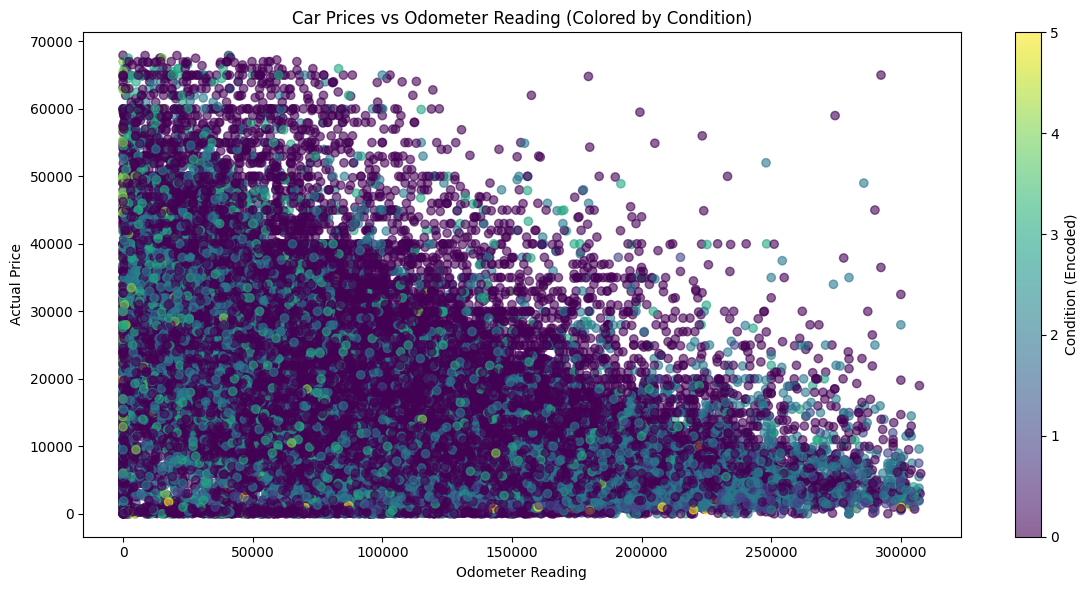

In [377]:
# 4. Scatter Plot: Price vs Odometer with Color-coded Condition
condition_codes = cars_df['condition'].astype('category').cat.codes  # Convert condition to numeric codes
plt.figure(figsize=(12, 6))
scatter = plt.scatter(cars_df['odometer'], cars_df['actual_price'],
                      c=condition_codes, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Condition (Encoded)')
plt.title('Car Prices vs Odometer Reading (Colored by Condition)')
plt.xlabel('Odometer Reading')
plt.ylabel('Actual Price')
plt.tight_layout()
plt.show()

<ipython-input-378-544f9d3acec4>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_actual = cars_df.groupby(['odometer_bin', 'condition']).agg({


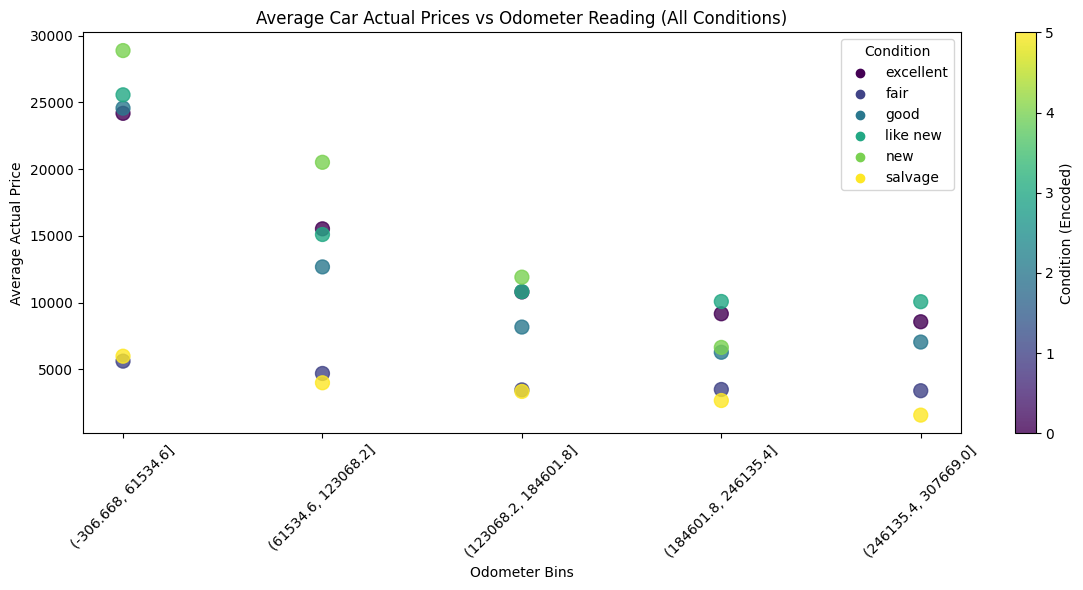

In [378]:
# 5a. Group by Odometer (or bins of odometer) and Condition - Actual Prices
cars_df['odometer_bin'] = pd.cut(cars_df['odometer'], bins=5)  # Create bins for odometer values
grouped_actual = cars_df.groupby(['odometer_bin', 'condition']).agg({
    'actual_price': 'mean'
}).reset_index()

# Convert condition to numeric codes for coloring
grouped_actual['condition_code'] = grouped_actual['condition'].astype('category').cat.codes

# Scatter plot with average prices for all conditions
plt.figure(figsize=(12, 6))
scatter_actual = plt.scatter(grouped_actual['odometer_bin'].astype(str), grouped_actual['actual_price'],
                      c=grouped_actual['condition_code'], cmap='viridis', s=100, alpha=0.8)

# Add color bar for condition (optional)
plt.colorbar(scatter_actual,  label='Condition (Encoded)')

# Add titles and labels
plt.title('Average Car Actual Prices vs Odometer Reading (All Conditions)')
plt.xlabel('Odometer Bins')
plt.ylabel('Average Actual Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Manually add a legend for all conditions
unique_conditions_actual = grouped_actual['condition'].unique()
colors = plt.cm.viridis(grouped_actual['condition_code'].unique() / grouped_actual['condition_code'].max())
for condition, color in zip(unique_conditions_actual, colors):
    plt.scatter([], [], color=color, label=condition)  # Add an invisible scatter point for the legend

plt.legend(title='Condition', loc='upper right')  # Add legend to the plot

plt.tight_layout()
plt.show()

<ipython-input-379-501916272de1>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_predict = cars_df.groupby(['odometer_bin', 'condition']).agg({


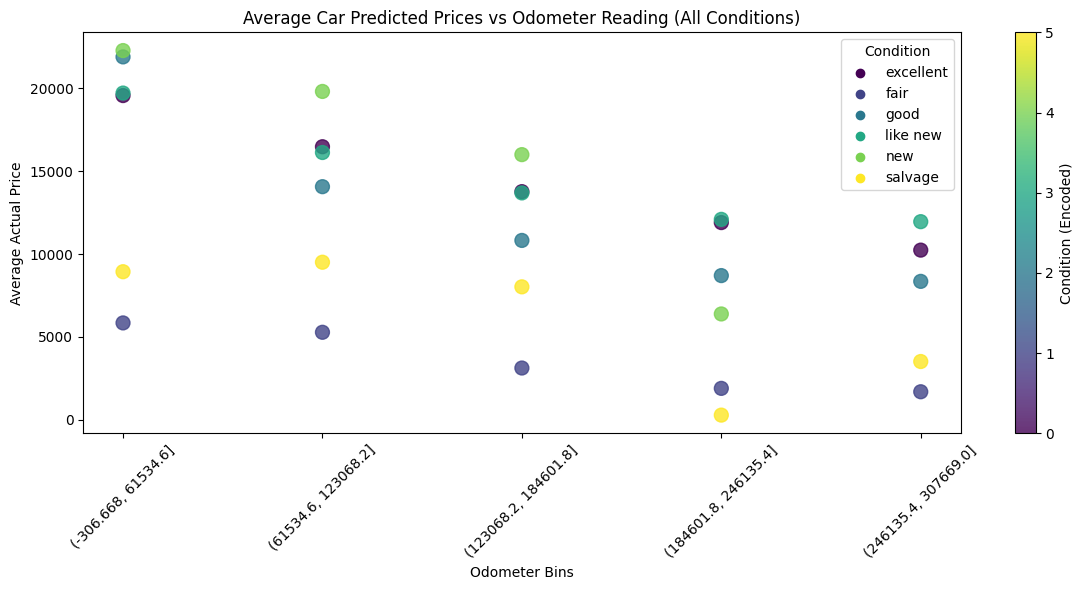

In [379]:
# 5b. Group by Odometer (or bins of odometer) and Condition - Predicted Prices
cars_df['odometer_bin'] = pd.cut(cars_df['odometer'], bins=5)  # Create bins for odometer values
grouped_predict = cars_df.groupby(['odometer_bin', 'condition']).agg({
    'predicted_price': 'mean'
}).reset_index()

# Convert condition to numeric codes for coloring
grouped_predict['condition_code'] = grouped_predict['condition'].astype('category').cat.codes

# Scatter plot with average prices for all conditions
plt.figure(figsize=(12, 6))
scatter_predict = plt.scatter(grouped_predict['odometer_bin'].astype(str), grouped_predict['predicted_price'],
                      c=grouped_predict['condition_code'], cmap='viridis', s=100, alpha=0.8)

# Add color bar for condition (optional)
plt.colorbar(scatter_predict, label='Condition (Encoded)')

# Add titles and labels
plt.title('Average Car Predicted Prices vs Odometer Reading (All Conditions)')
plt.xlabel('Odometer Bins')
plt.ylabel('Average Actual Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Manually add a legend for all conditions
unique_conditions_predict = grouped_predict['condition'].unique()
colors = plt.cm.viridis(grouped_predict['condition_code'].unique() / grouped_predict['condition_code'].max())
for condition, color in zip(unique_conditions_predict, colors):
    plt.scatter([], [], color=color, label=condition)  # Add an invisible scatter point for the legend

plt.legend(title='Condition', loc='upper right')  # Add legend to the plot

plt.tight_layout()
plt.show()